# Analyzing NYTbd Sample 3
<br>
This notebook is looking at the NYTbd Sample 3 content analyzed by ACCENT and PETRARCH2 to identify current limitations with PETRARCH2 and to try and devise solutions. 

In [1]:
# Setup Environment
from nltk.parse.corenlp import CoreNLPServer
from nltk.parse.corenlp import CoreNLPDependencyParser
from nltk.parse import CoreNLPParser

import pandas as pd

import pprint
import nltk

from nltk.tree import *
from IPython.display import display

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#### Link to Java Server for Standford CoreNLP
<br>
java -mx4g -cp "*" edu.stanford.nlp.pipeline.StanfordCoreNLPServer -annotators "tokenize,ssplit,pos,lemma,parse,sentiment" -port 9000 -timeout 100000

In [2]:
# Connect to Server
parser = CoreNLPParser('http://localhost:9000')
depr = CoreNLPDependencyParser('http://localhost:9000')

#### Write Some Functions for Parsing Text

In [3]:
# Core Parser- save as df['parsed']
def core_parser(df, col):
    parse = []
    i = ""
    for i in range(len(df)):
        parse.append(i)
        parse[i] = next(parser.raw_parse(df[col].iloc[i]))
    return parse

# Dependency Parser- save as df['dep']
def dep_parser(df, col):
    dep = []
    i = ""
    for i in range(len(df)):
        dep.append(i)
        dep[i] = next(depr.raw_parse(df[col].iloc[i]))
    return dep

# For easy display of both parse trees, text, and code
def easy_read(corp, index_num):
    display(corp['parsed'].iloc[index_num])
    display(corp['dep'].iloc[index_num])
    display("Text = " + corp.iloc[index_num].loc['text'])
    display("Code = " + str(corp.iloc[index_num].loc['code']))
    
# function to display only constituency parse with POS tags with text and code
def parsed_output(corp, index_num):
    display(corp['parsed'].iloc[index_num])
    display("Text = " + corp.iloc[index_num].loc['text'])
    display("Code = " + str(corp.iloc[index_num].loc['code']))
    display("AID = " + str(corp.iloc[index_num].loc['aid']))
    
# function to display only dependency parse with text and code
def dependency_output(corp, index_num):
    display(corp['dep'].iloc[index_num])
    display("Text = " + corp.iloc[index_num].loc['text'])
    display("Code = " + str(corp.iloc[index_num].loc['code']))
    
# function to display constituency parse of a single sentence
def one_sentence_parser(text):
    output = next(parser.raw_parse(text))
    return output

## Read in NYTbd Sample 3 Data- ACCENT and PETRARCH2

In [4]:
accent3 = pd.read_stata("/Volumes/PartTime/Jonathan Bonaguro - Spring 2020/NYTbd sample 3/Accent_NYTbd_sample3.dta")
petrarch3 = pd.read_stata("/Volumes/PartTime/Jonathan Bonaguro - Spring 2020/NYTbd sample 3/Petrarch_NYTbd_sample3.dta")

In [5]:
# parse accent3 
%time accent3['parsed'] = core_parser(accent3, 'text')
accent3['dep'] = dep_parser(accent3, 'text')

CPU times: user 527 ms, sys: 44.8 ms, total: 572 ms
Wall time: 2min 26s


In [6]:
# parse petrarch3 
%time petrarch3['parsed'] = core_parser(petrarch3, 'text')
petrarch3['dep'] = dep_parser(petrarch3, 'text')

CPU times: user 94.8 ms, sys: 8.33 ms, total: 103 ms
Wall time: 5.24 s


## Subset Data by Event Coder

In [33]:
keys = list(['aid', 'code'])
accent3_index = accent3.set_index(keys).index
petrarch3_index = petrarch3.set_index(keys).index

# Produce df's of mutually exclusive events 
accent3_only = accent3[~accent3_index.isin(petrarch3_index)]
petrarch3_only = petrarch3[~petrarch3_index.isin(accent3_index)]

# Produce df's of same article, same coding
accent3_same_code = accent3[accent3_index.isin(petrarch3_index)]
petrarch3_same_code = petrarch3[petrarch3_index.isin(accent3_index)]

# sort values on AID and reset index 
accent3_only = accent3_only.sort_values('aid').reset_index(drop = True)
petrarch3_only = petrarch3_only.sort_values('aid').reset_index(drop = True)

accent3_same_code = accent3_same_code.sort_values('aid').reset_index(drop = True)
petrarch3_same_code = petrarch3_same_code.sort_values('aid').reset_index(drop = True)

## Look for errors in ACCENT and PETRARCH
<br>
Event codes: 140, 141, 143, 145, 1723, 181, 183, 1831, 186

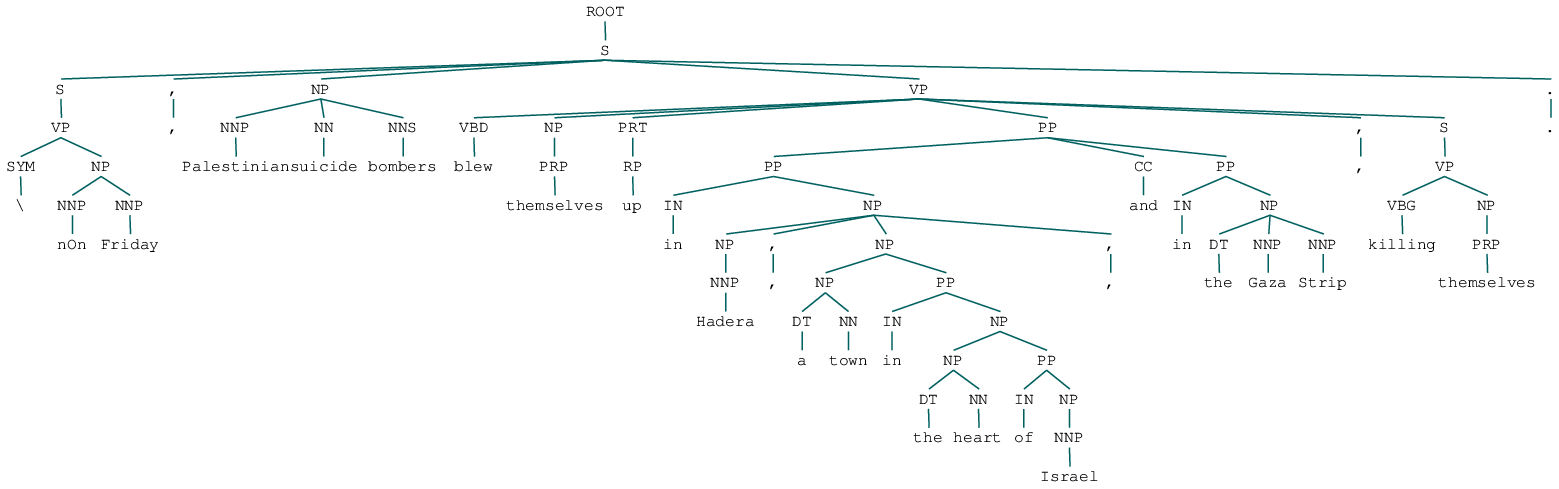

'Text = \\nOn Friday, Palestinian suicide bombers blew themselves up in Hadera, a town in the heart of Israel, and in the Gaza Strip, killing themselves.'

'Code = 1831'

'AID = 23797552'

0

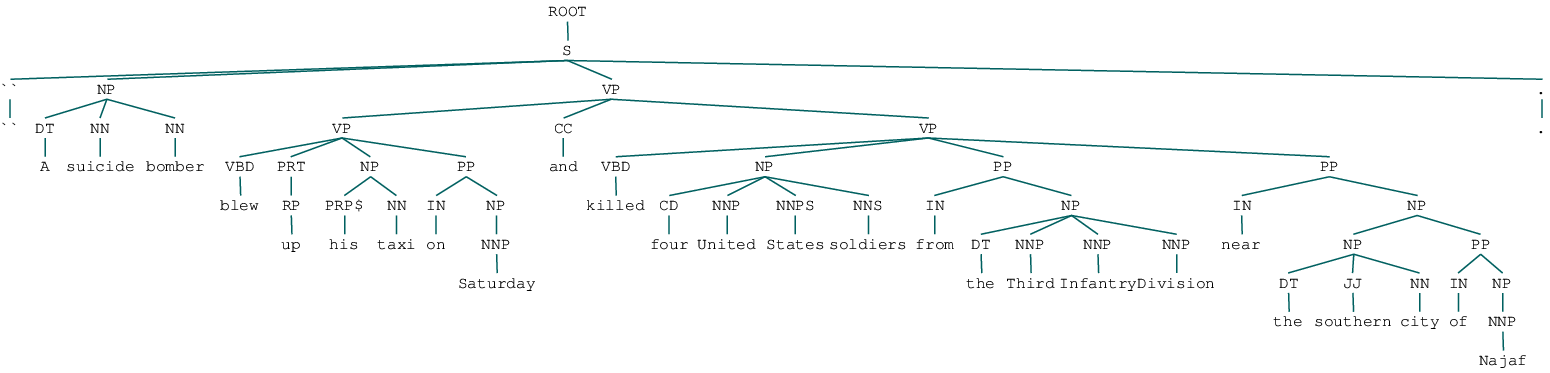

'Text = "A suicide bomber blew up his taxi on Saturday and killed four United States soldiers from the Third Infantry Division near the southern city of Najaf.'

'Code = 1831'

'AID = 23920409'

1

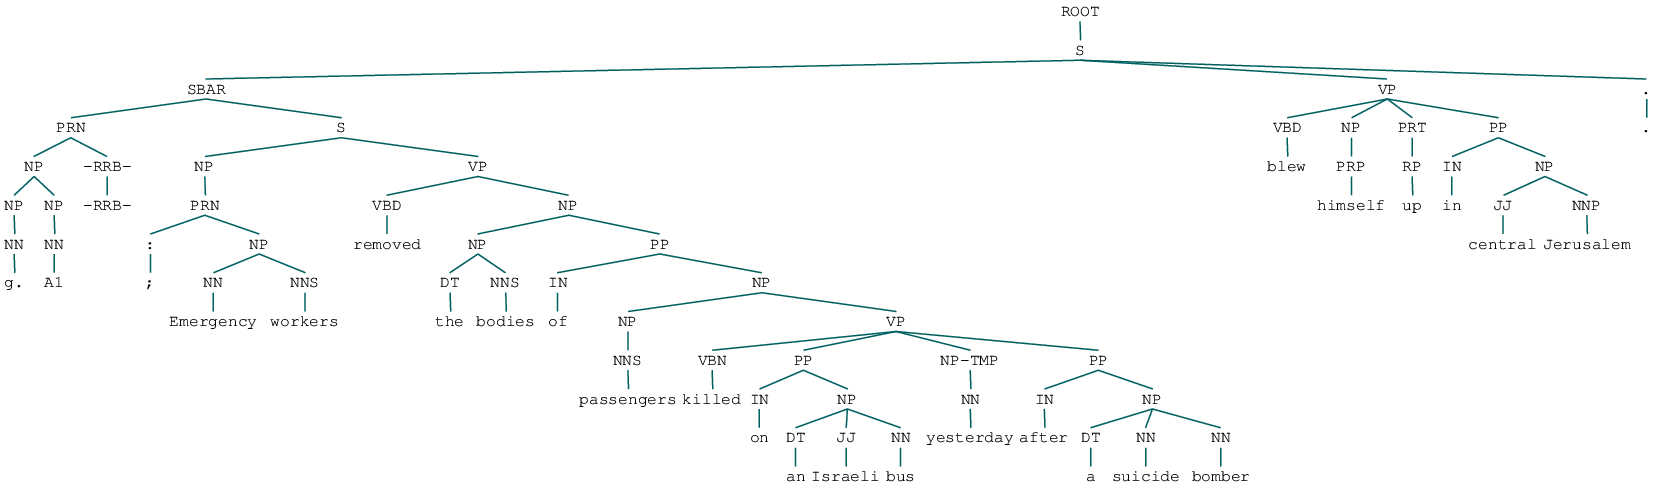

'Text = g. A1); Emergency workers removed the bodies of passengers killed on an Israeli bus yesterday after a suicide bomber blew himself up in central Jerusalem.'

'Code = 1831'

'AID = 23944572'

2

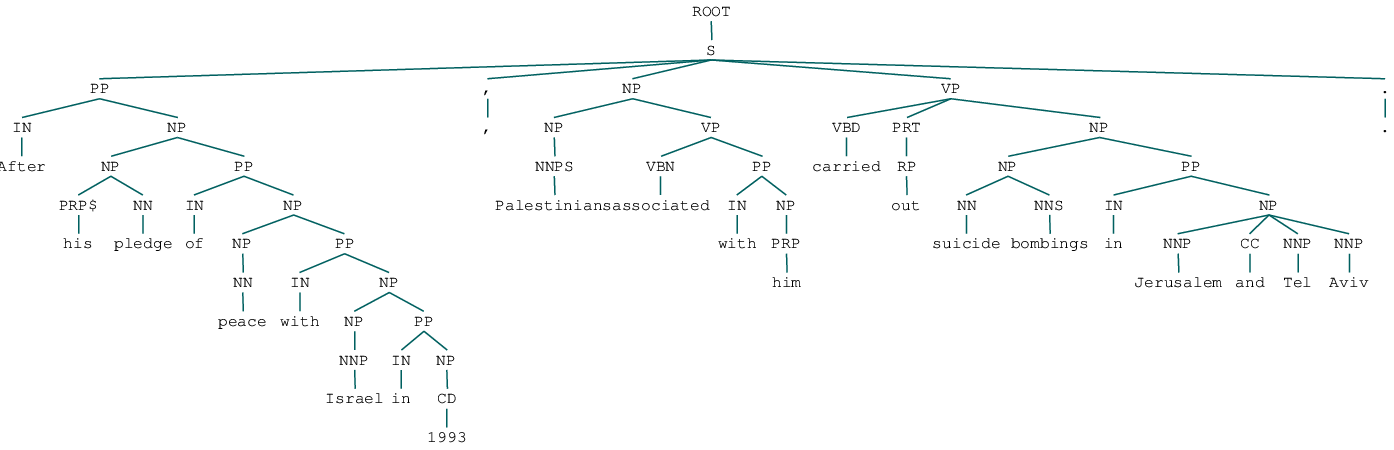

'Text = After his pledge of peace with Israel in 1993, Palestinians associated with him carried out suicide bombings in Jerusalem and Tel Aviv.'

'Code = 1831'

'AID = 23968837'

3

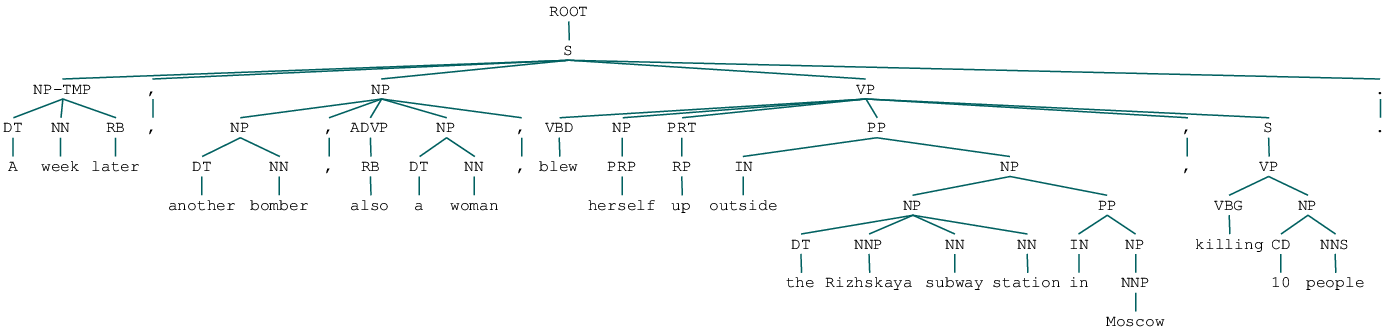

'Text = A week later, another bomber, also a woman, blew herself up outside the Rizhskaya subway station in Moscow, killing 10 people.'

'Code = 1831'

'AID = 23974128'

4

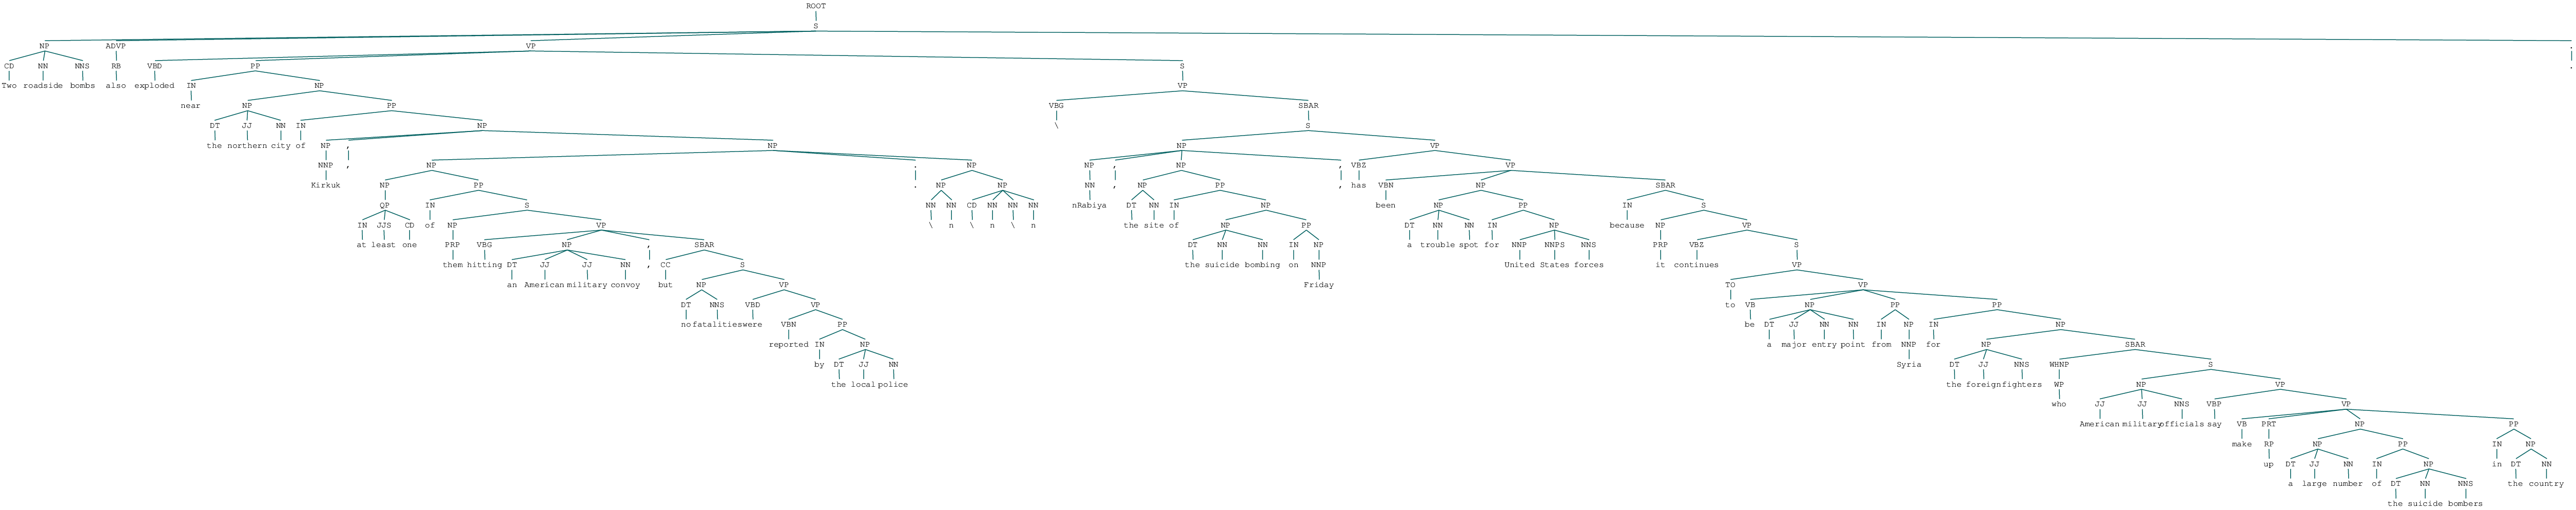

'Text = Two roadside bombs also exploded near the northern city of Kirkuk, at least one of them hitting an American military convoy, but no fatalities were reported by the local police.\\n\\n\\n\\nRabiya, the site of the suicide bombing on Friday, has been a trouble spot for United States forces because it continues to be a major entry point from Syria for the foreign fighters who American military officials say make up a large number of the suicide bombers in the country.'

'Code = 1831'

'AID = 24056476'

5

In [30]:
for i in range(len(accent3_same_code[accent3_same_code.code == '1831'])):
    parsed_output(accent3_same_code[accent3_same_code.code == '1831'], i)
    display(i)

## Look at ACCENT data to identify dictionary improvements

In [8]:
## Create subsets of data discarding identified errors in ACCENT coding

# event code 141
accent3_141 = accent3_only[accent3_only.code == '141'].reset_index(drop = True).drop([0, 2, 6, 8, 10, 11, 21, 23]).reset_index(drop = True)

# event code 143
accent3_143 = accent3_only[accent3_only.code == '143'].reset_index(drop = True).drop([9, 13, 19]).reset_index(drop = True)

# event code 145
accent3_145 = accent3_only[accent3_only.code == '145'].reset_index(drop = True).drop([8, 21, 23]).reset_index(drop = True)

# event code 1723
accent3_1723 = accent3_only[accent3_only.code == '1723'].reset_index(drop = True).drop([8, 12, 15]).reset_index(drop = True)

# event code 181
accent3_181 = accent3_only[accent3_only.code == '181'].reset_index(drop = True).drop([12]).reset_index(drop = True)

# event code 1831
accent3_1831 = accent3_only[accent3_only.code == '1831'].reset_index(drop = True).drop([8]).reset_index(drop = True)

# event code 186
accent3_186 = accent3_only[accent3_only.code == '186'].reset_index(drop = True).drop([9, 12]).reset_index(drop = True)

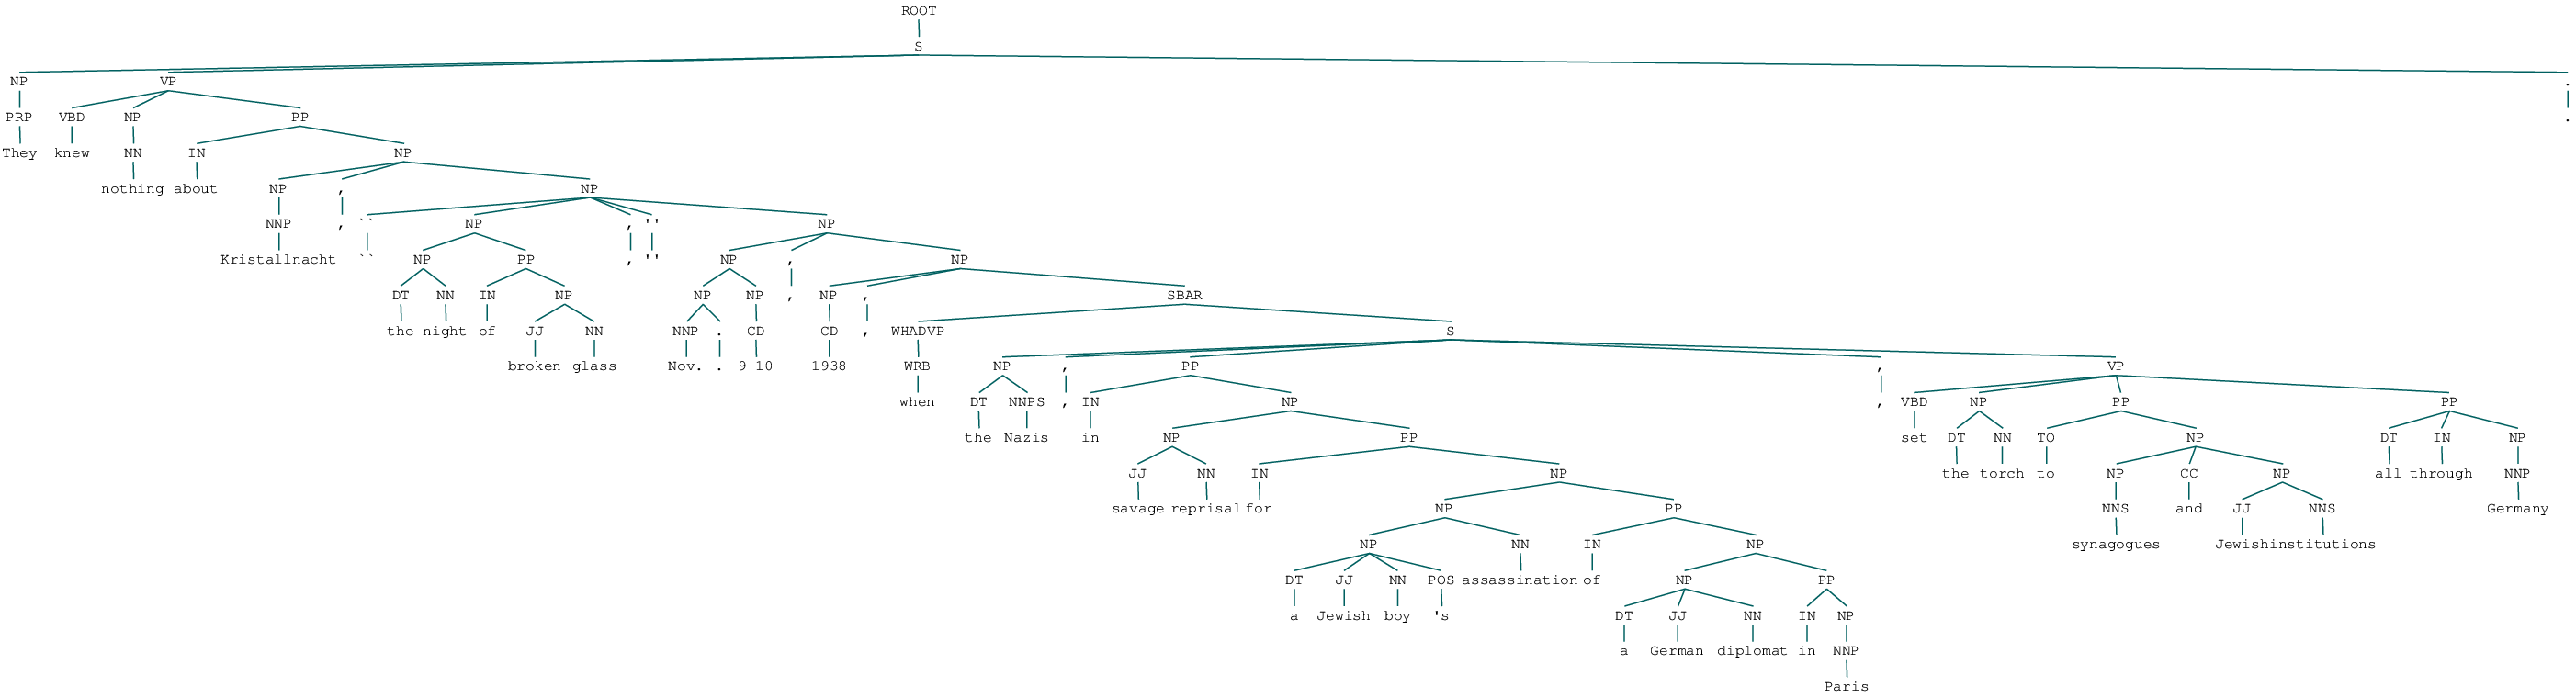

"Text = They knew nothing about Kristallnacht, ''the night of broken glass,'' Nov.  9-10, 1938, when the Nazis, in savage reprisal for a Jewish boy's assassination of a German diplomat in Paris, set the torch to synagogues and Jewish institutions all through Germany."

'Code = 186'

'AID = 22399724'

0

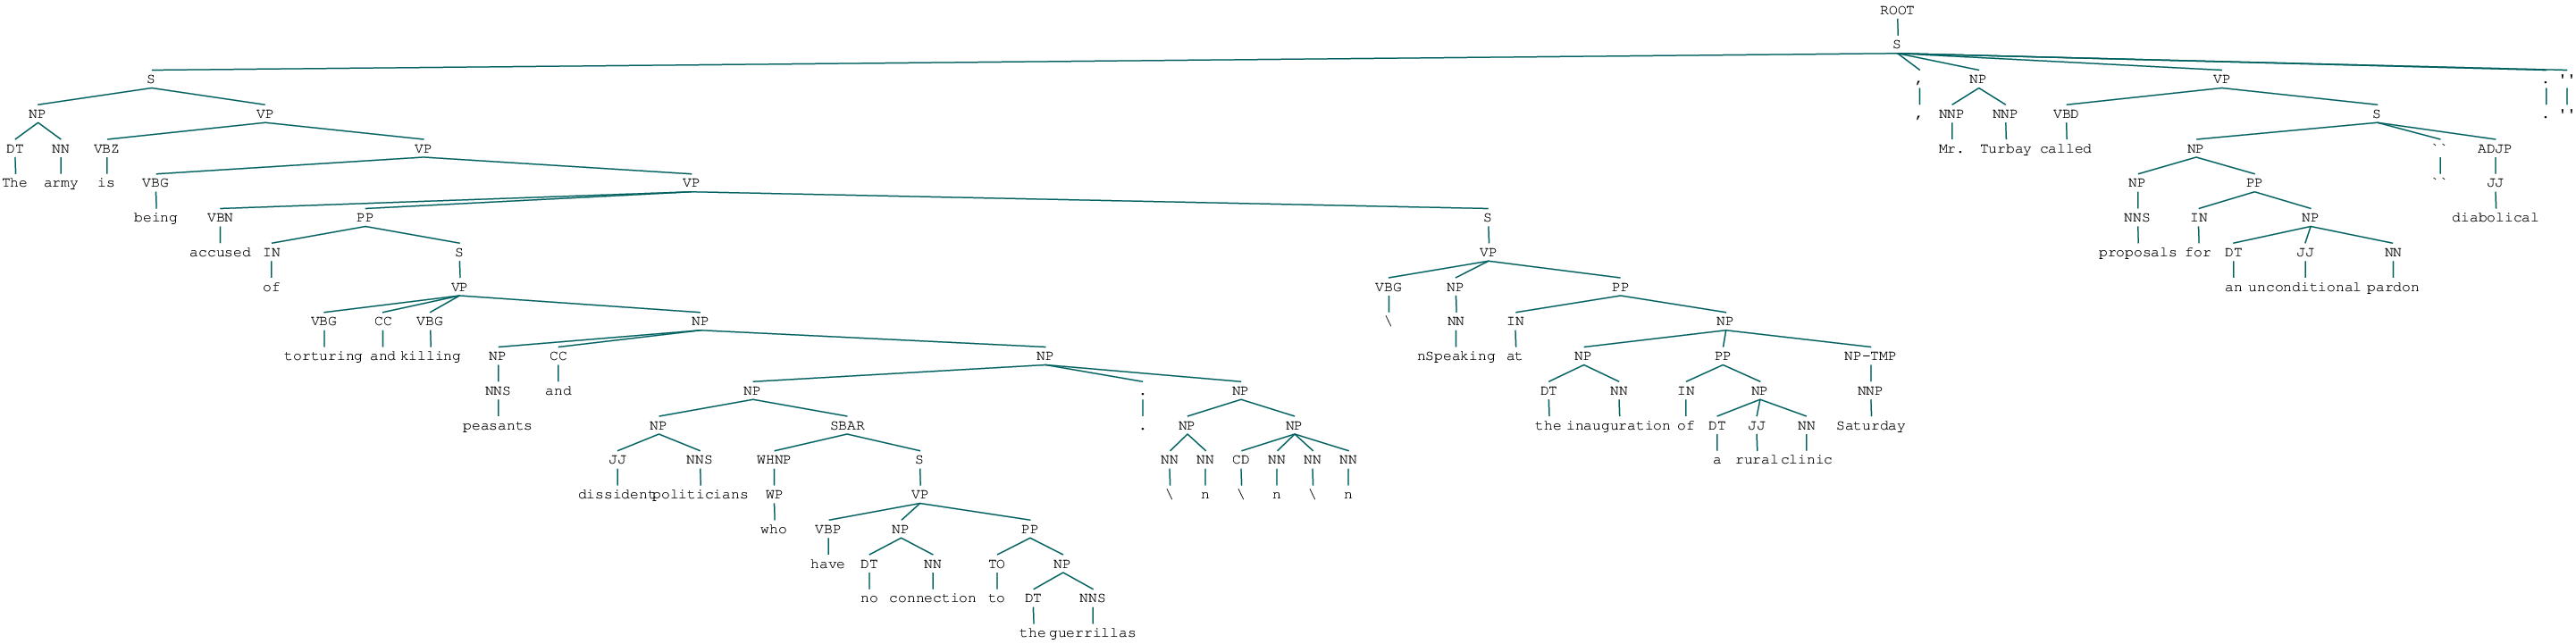

"Text = The army is being accused of torturing and killing peasants and dissident politicians who have no connection to the guerrillas.\\n\\n\\n\\nSpeaking at the inauguration of a rural clinic Saturday, Mr. Turbay called proposals for an unconditional pardon ''diabolical.''"

'Code = 186'

'AID = 22408177'

1

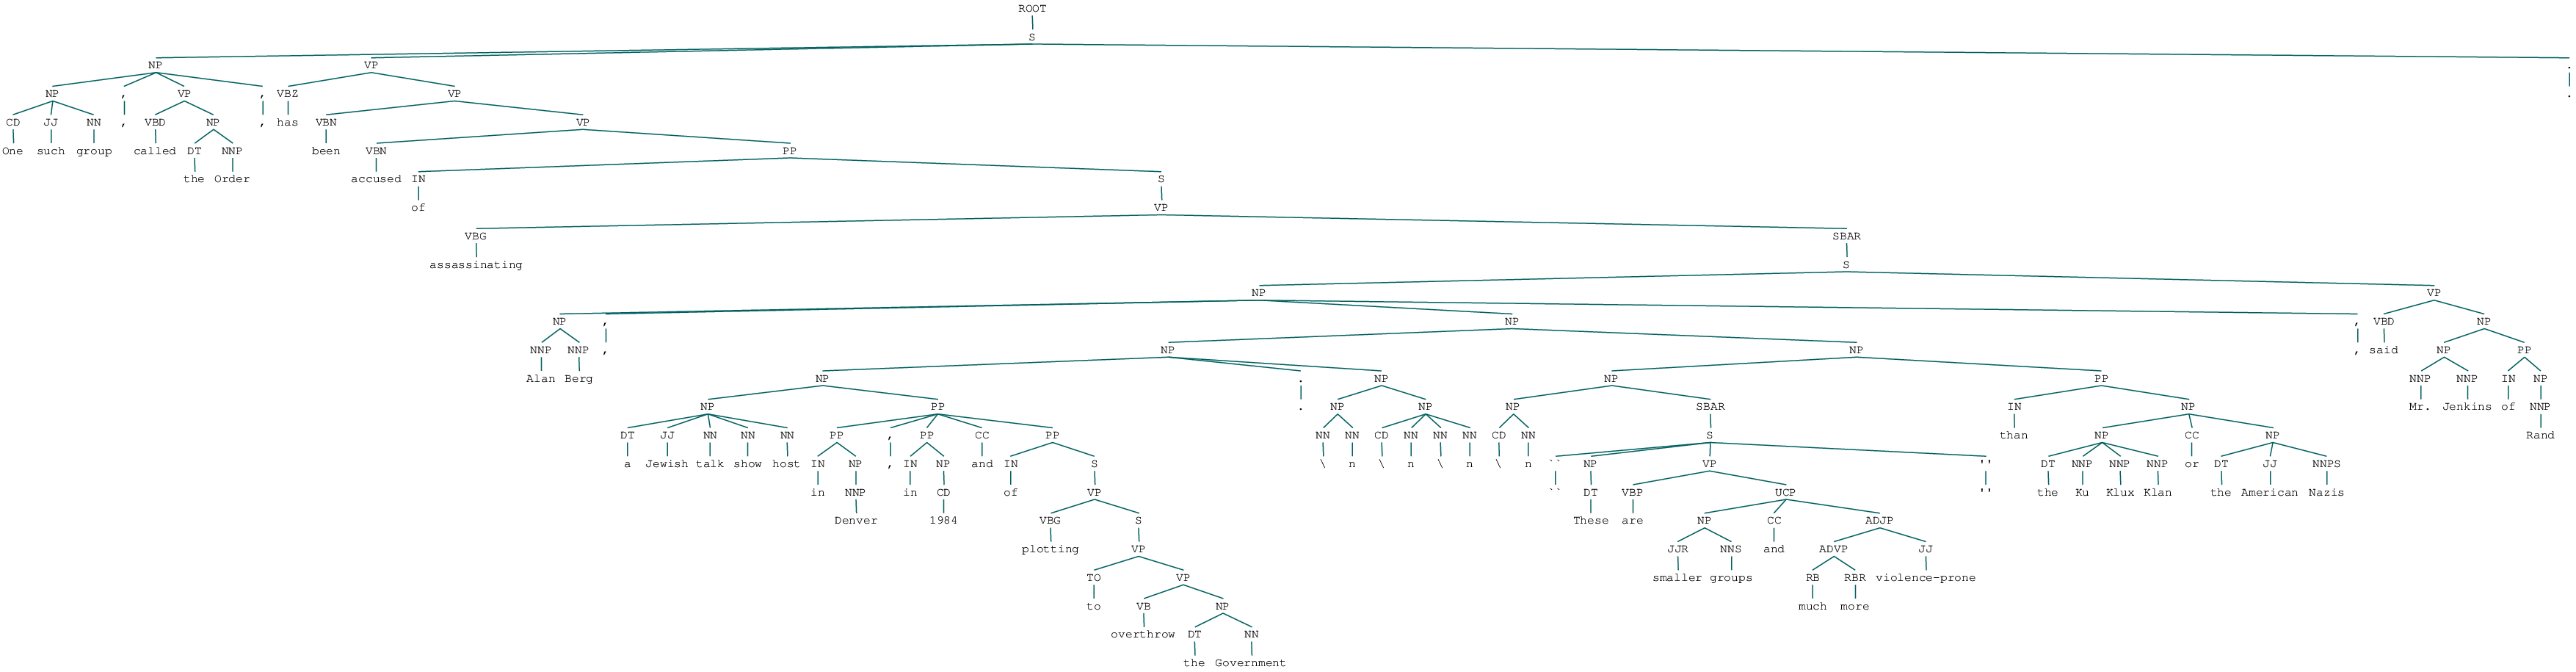

"Text = One such group, called the Order, has been accused of assassinating Alan Berg, a Jewish talk show host in Denver, in 1984 and of plotting to overthrow the Government.\\n\\n\\n\\n''These are smaller groups and much more violence-prone'' than the Ku Klux Klan or the American Nazis, said Mr. Jenkins of Rand."

'Code = 186'

'AID = 22700087'

2

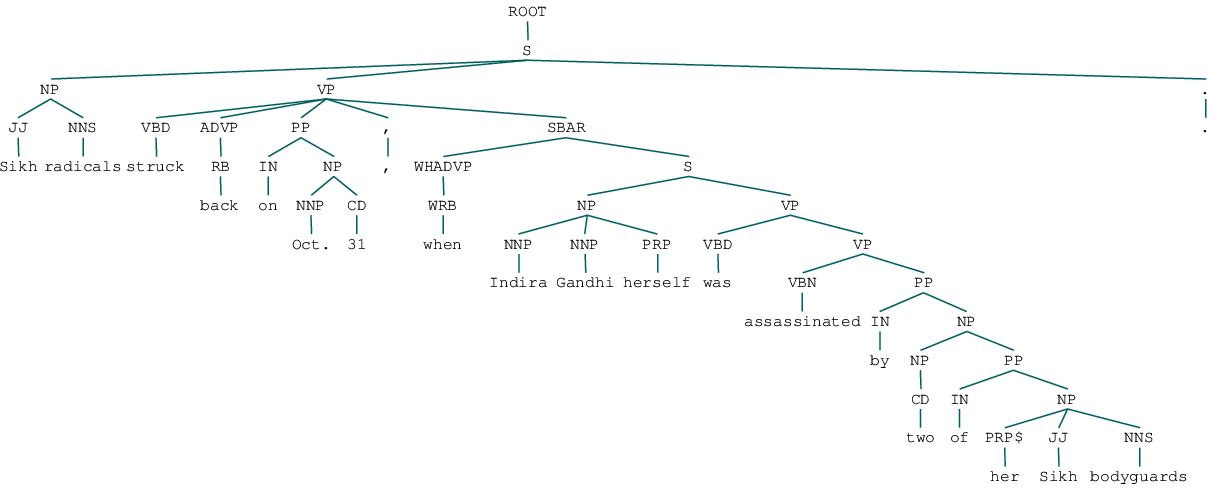

'Text = Sikh radicals struck back on Oct. 31, when Indira Gandhi herself was assassinated by two of her Sikh bodyguards.'

'Code = 186'

'AID = 22708031'

3

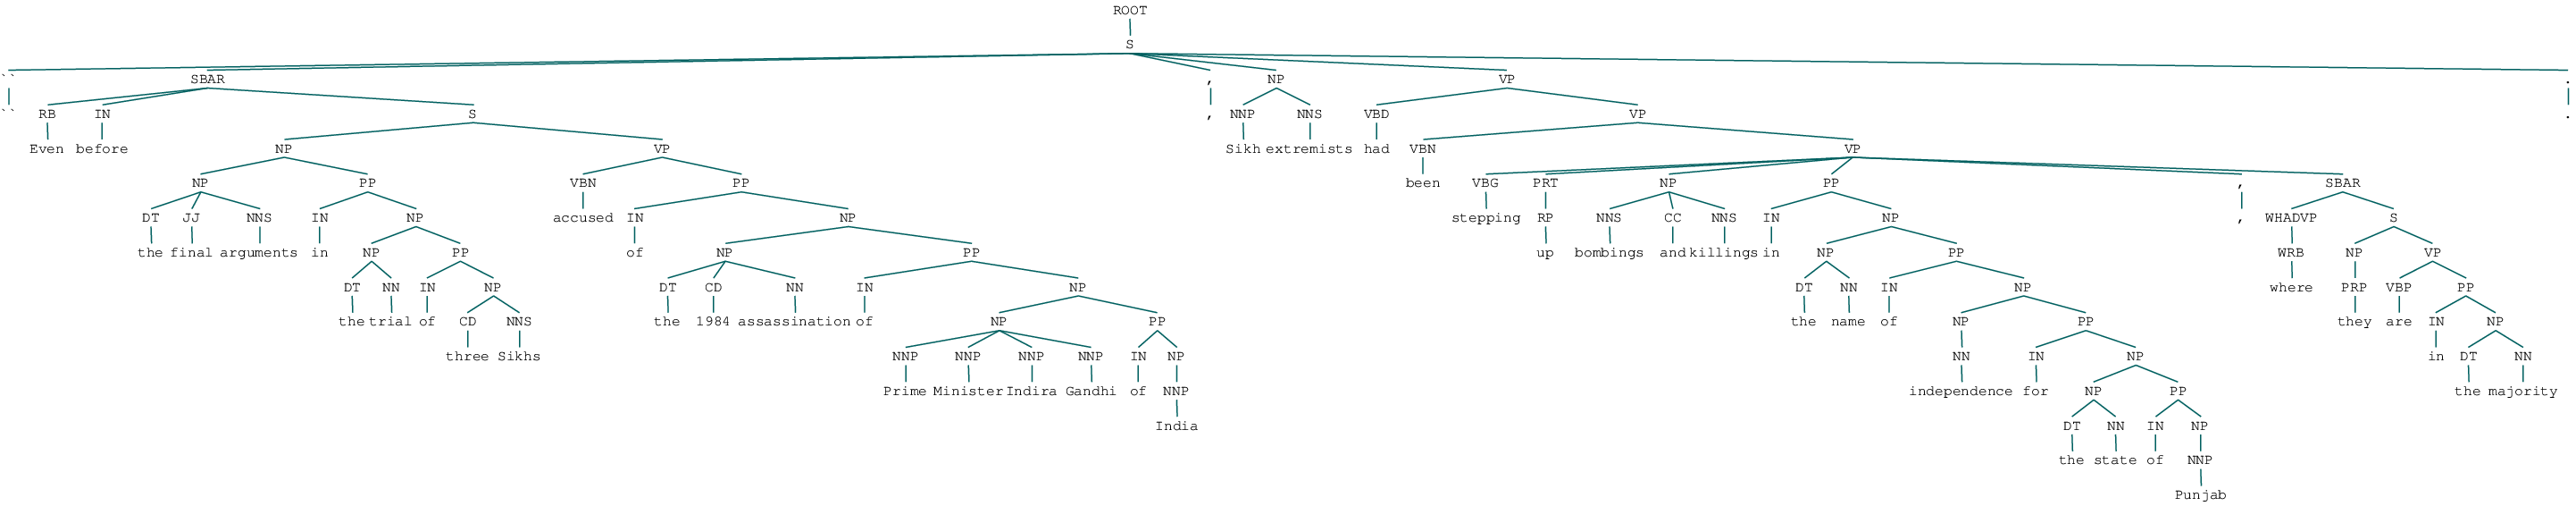

'Text = "Even before the final arguments in the trial of three Sikhs accused of the 1984 assassination of Prime Minister Indira Gandhi of India, Sikh extremists had been stepping up bombings and killings in the name of independence for the state of Punjab, where they are in the majority.'

'Code = 186'

'AID = 22732448'

4

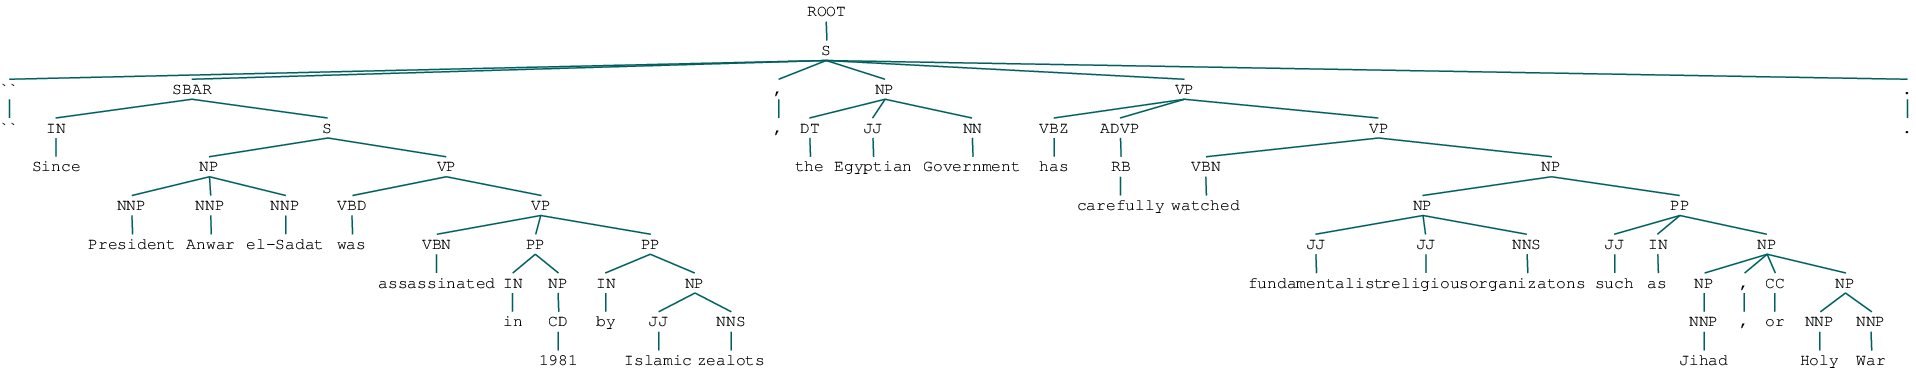

'Text = "Since President Anwar el-Sadat was assassinated in 1981 by Islamic zealots, the Egyptian Government has carefully watched fundamentalist religious organizatons such as Jihad, or Holy War.'

'Code = 186'

'AID = 22767925'

5

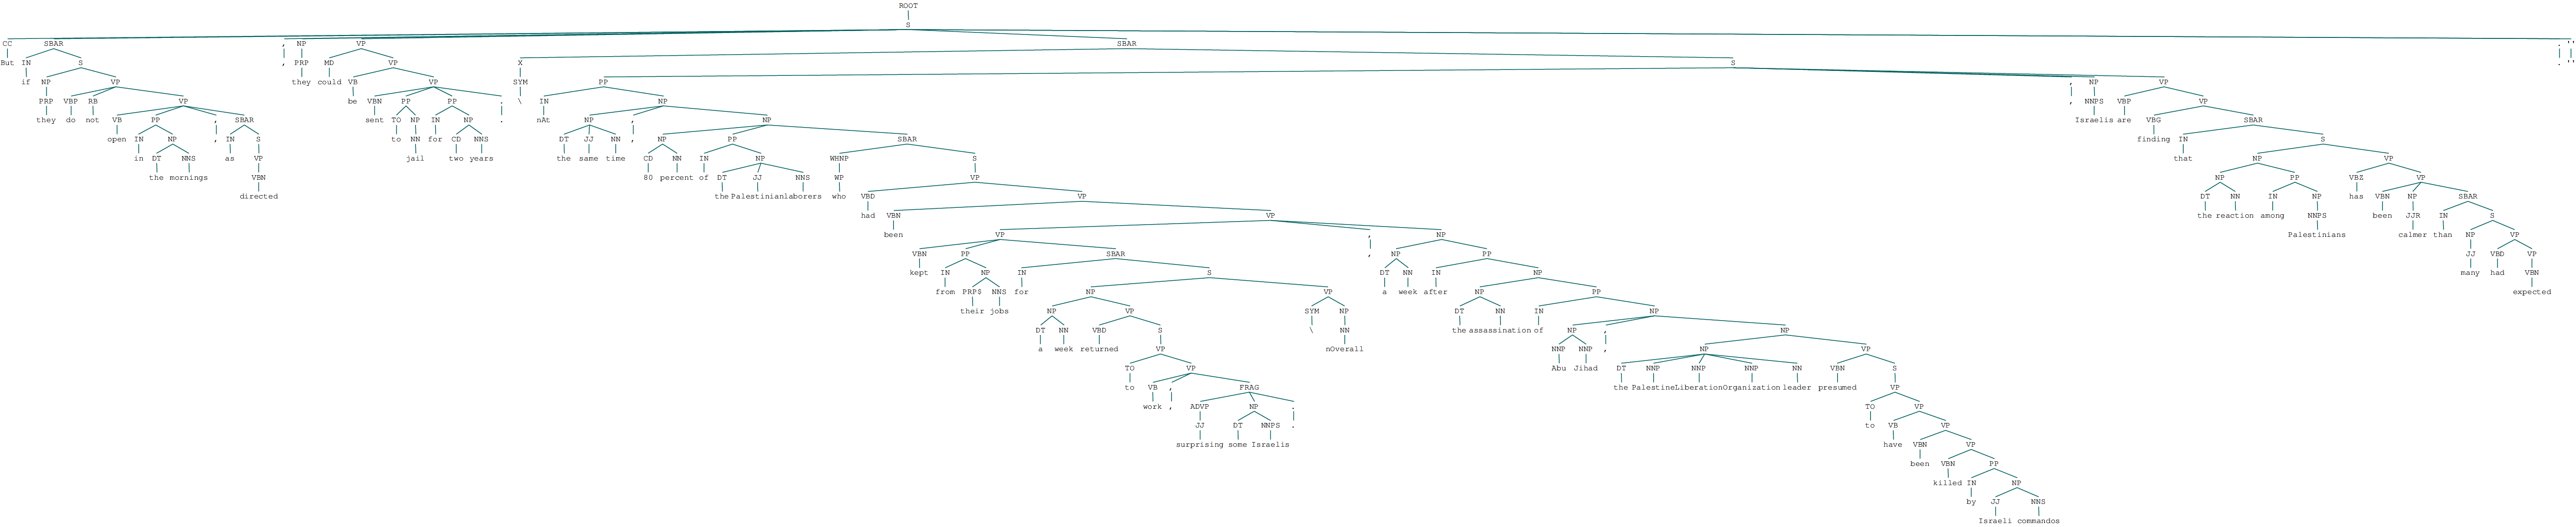

'Text = But if they do not open in the mornings, as directed, they could be sent to jail for two years.\\nAt the same time, 80 percent of the Palestinian laborers who had been kept from their jobs for a week returned to work, surprising some Israelis.\\nOverall, a week after the assassination of Abu Jihad, the Palestine Liberation Organization leader presumed to have been killed by Israeli commandos, Israelis are finding that the reaction among Palestinians has been calmer than many had expected."'

'Code = 186'

'AID = 22926433'

6

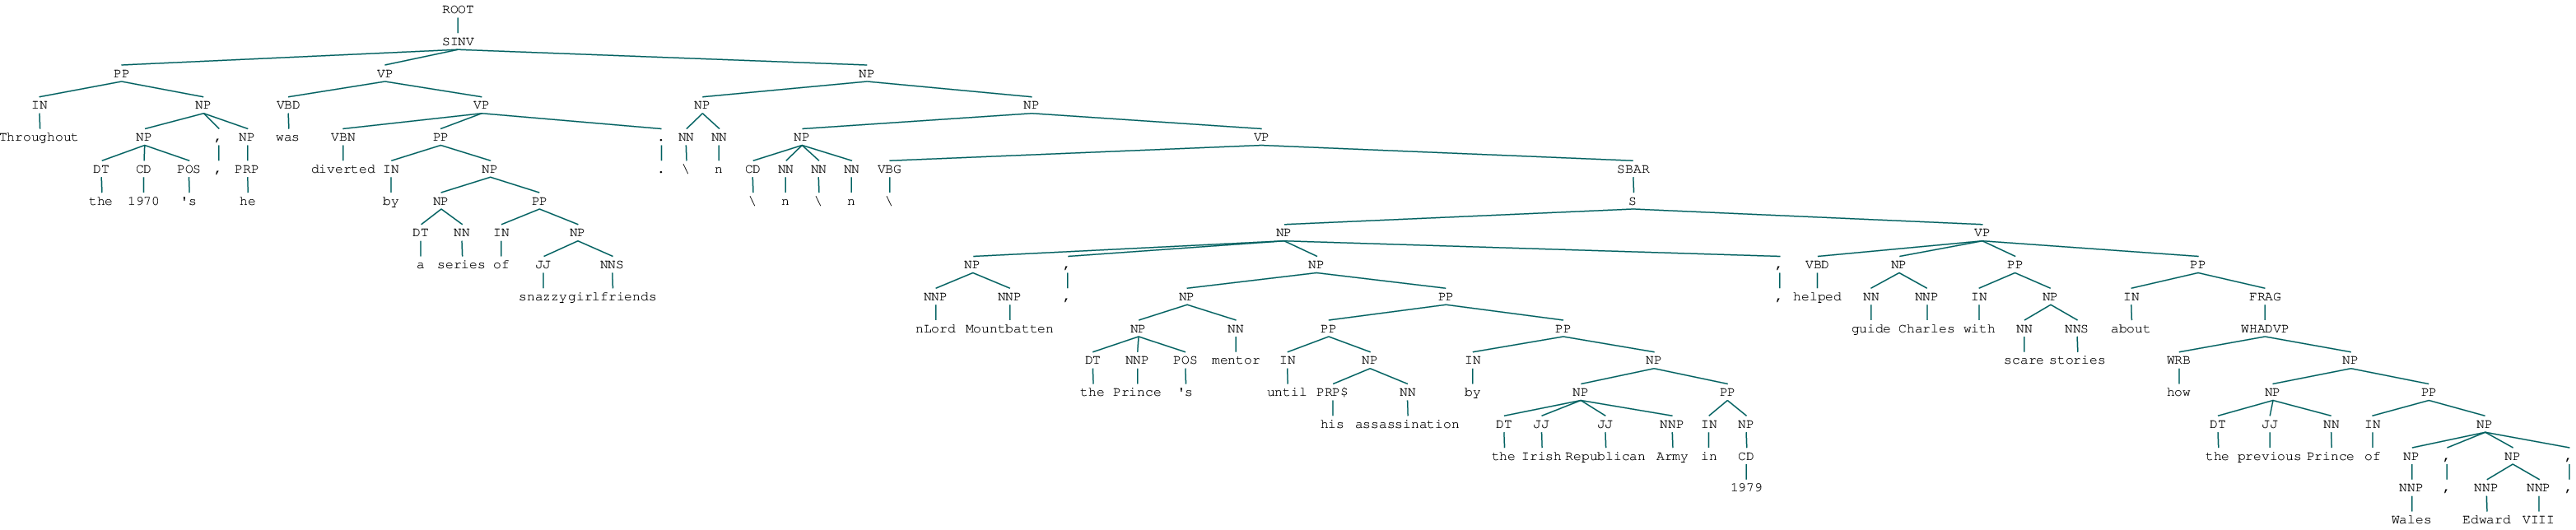

"Text = Throughout the 1970's, he was diverted by a series of snazzy girlfriends.\\n\\n\\n\\nLord Mountbatten, the Prince's mentor until his assassination by the Irish Republican Army in 1979, helped guide Charles with scare stories about how the previous Prince of Wales, Edward VIII,"

'Code = 186'

'AID = 22934235'

7

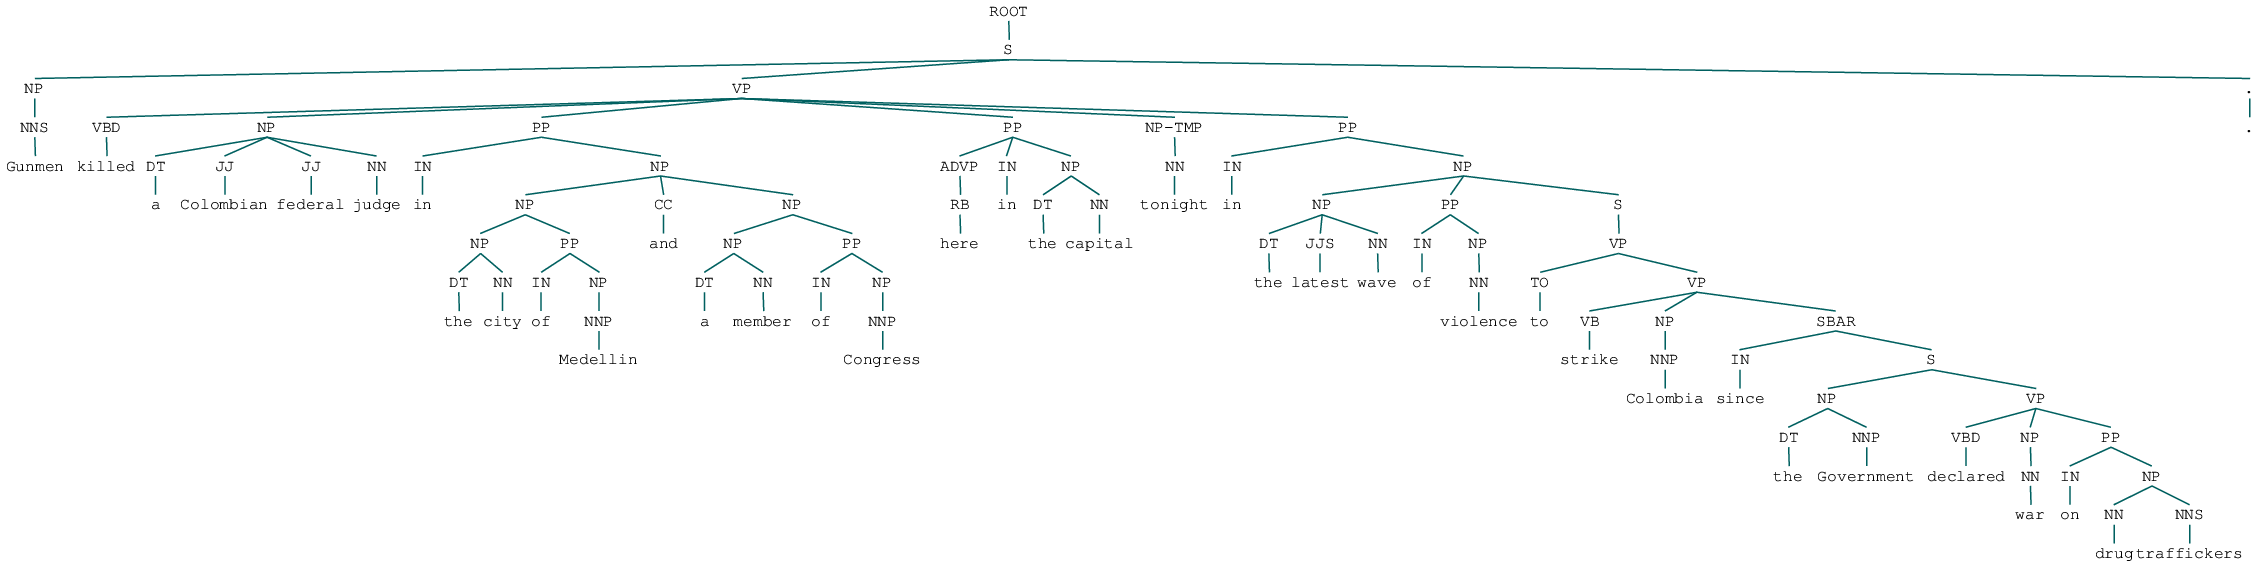

'Text = Gunmen killed a Colombian federal judge in the city of Medellin and a member of Congress here in the capital tonight in the latest wave of violence to strike Colombia since the Government declared war on drug traffickers.'

'Code = 186'

'AID = 23009544'

8

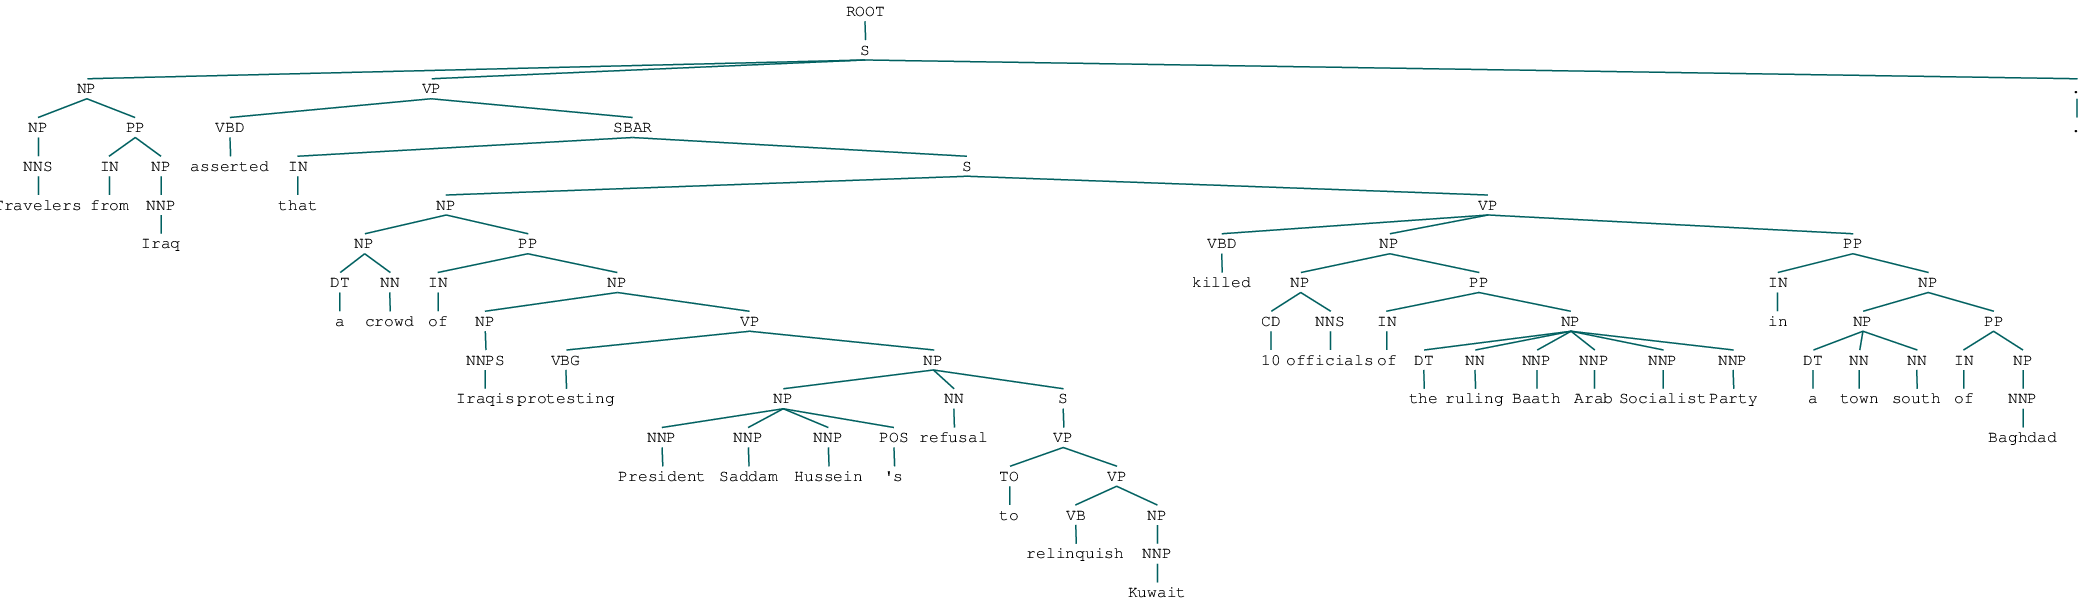

"Text = Travelers from Iraq asserted that a crowd of Iraqis protesting President Saddam Hussein's refusal to relinquish Kuwait killed 10 officials of the ruling Baath Arab Socialist Party in a town south of Baghdad."

'Code = 186'

'AID = 23115002'

9

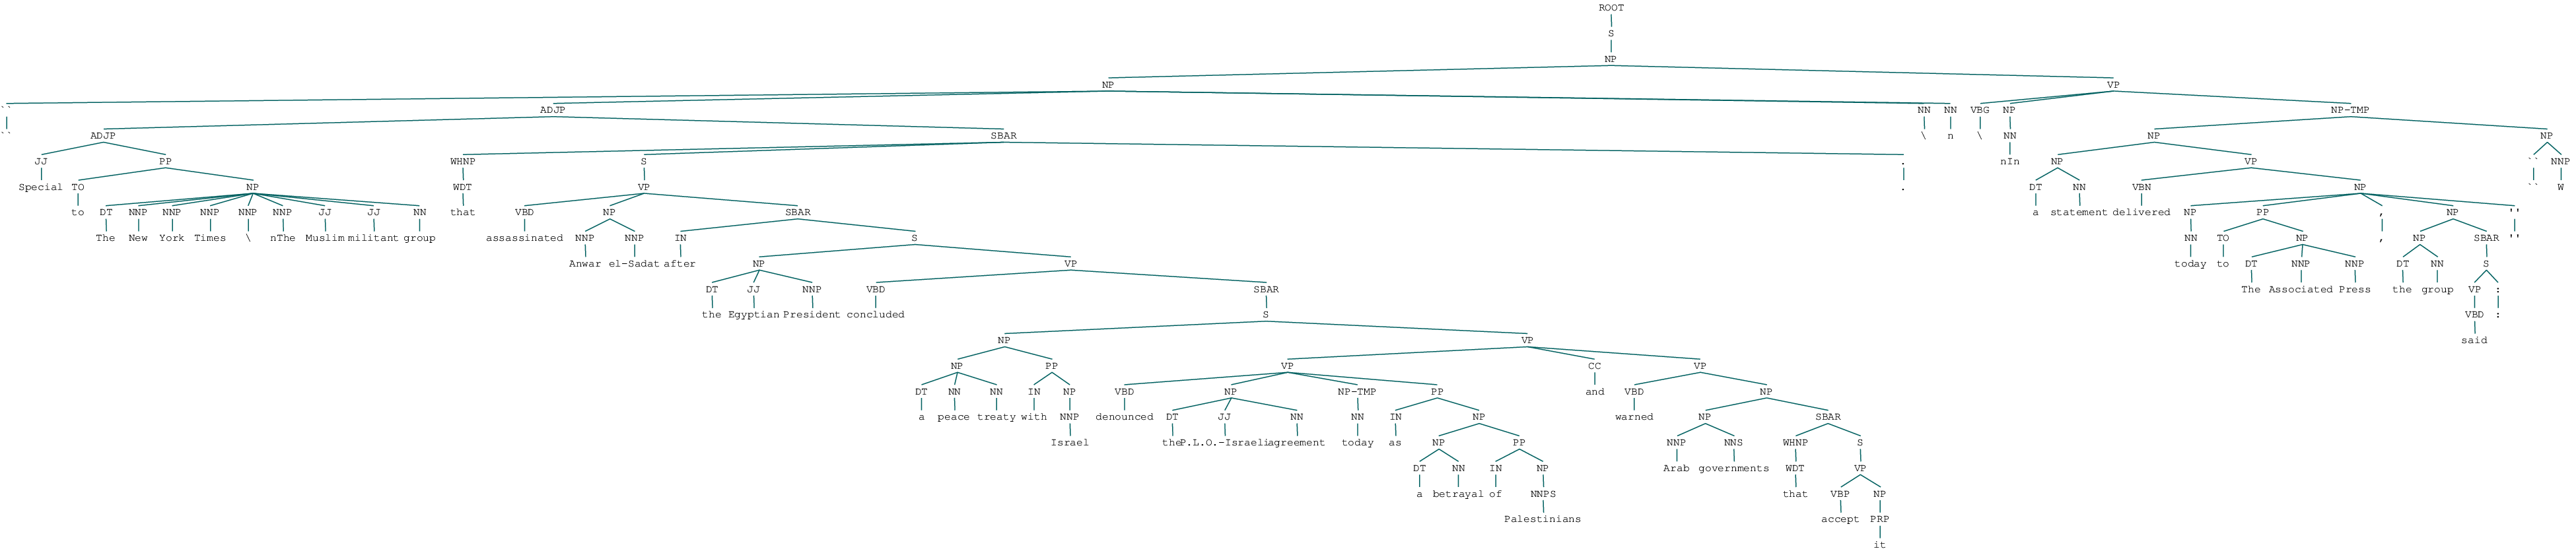

'Text = "Special to The New York Times\\nThe Muslim militant group that assassinated Anwar el-Sadat after the Egyptian President concluded a peace treaty with Israel denounced the P.L.O.-Israeli agreement today as a betrayal of Palestinians and warned Arab governments that accept it.\\n\\nIn a statement delivered today to The Associated Press, the group said: ""W'

'Code = 186'

'AID = 23302220'

10

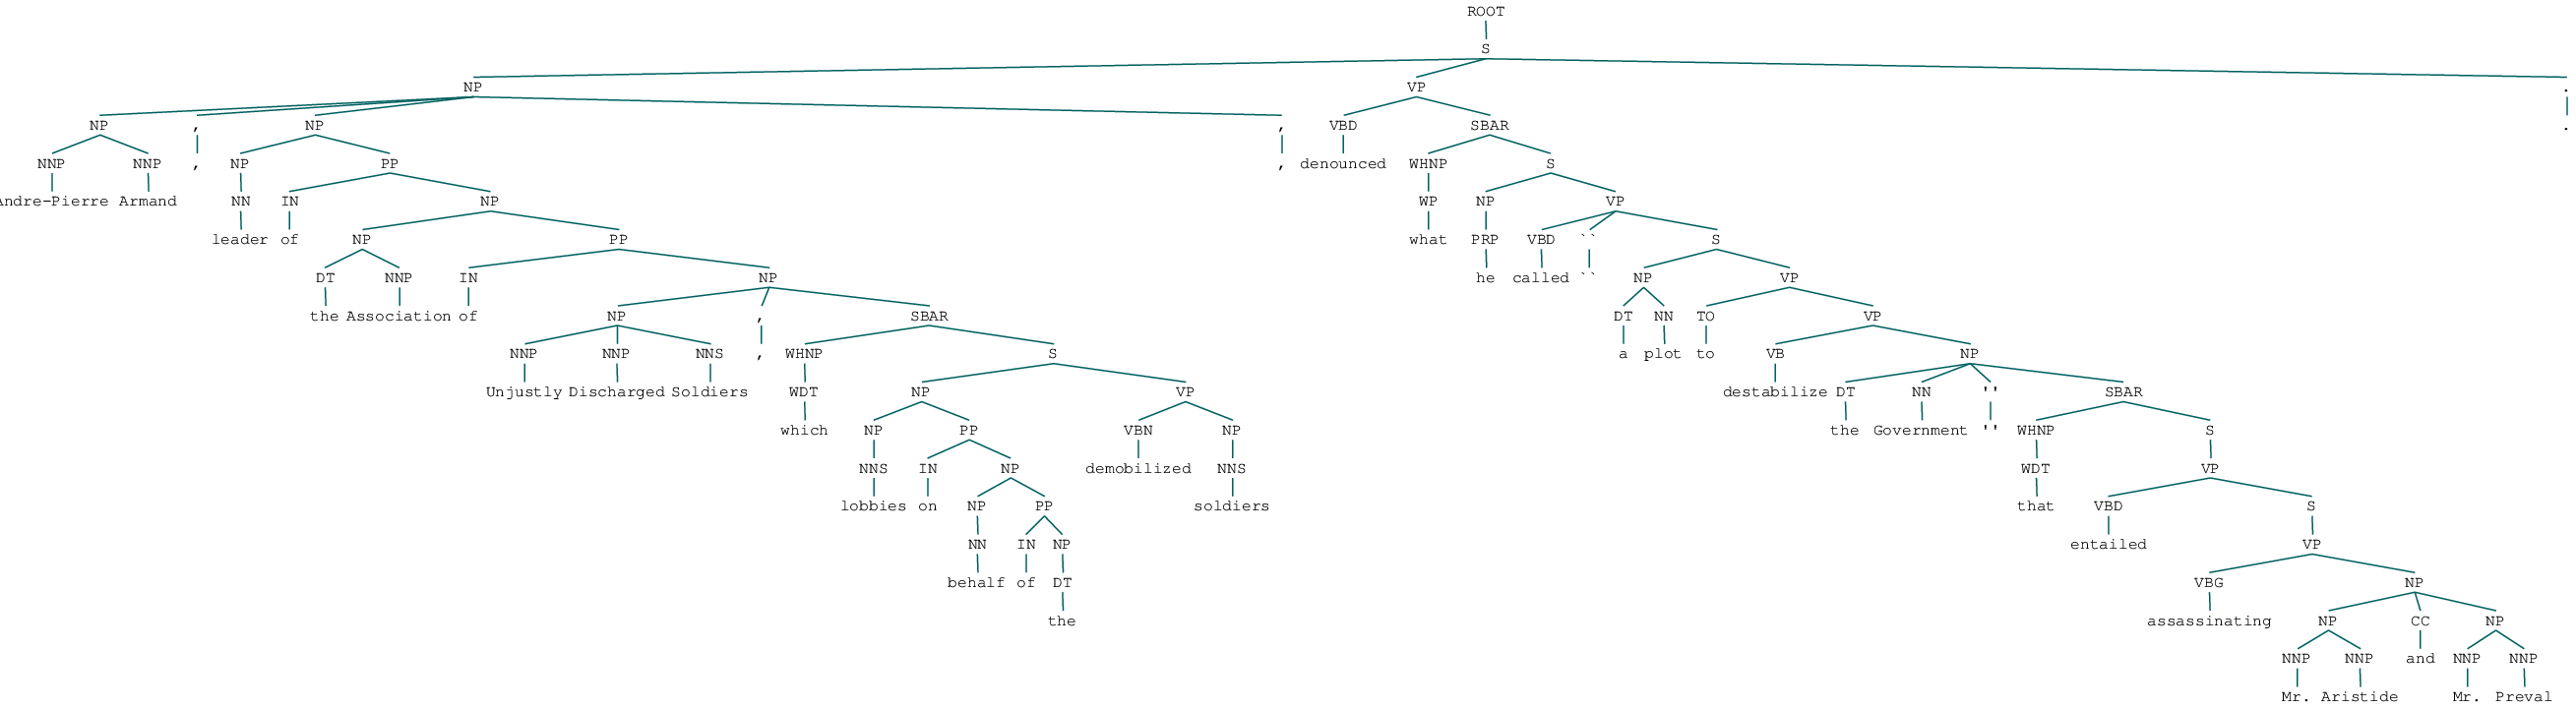

"Text =  Andre-Pierre Armand, leader of the Association of Unjustly Discharged Soldiers, which lobbies on behalf of the demobilized soldiers, denounced what he called ''a plot to destabilize the Government'' that entailed assassinating Mr. Aristide and Mr. Preval."

'Code = 186'

'AID = 23502816'

11

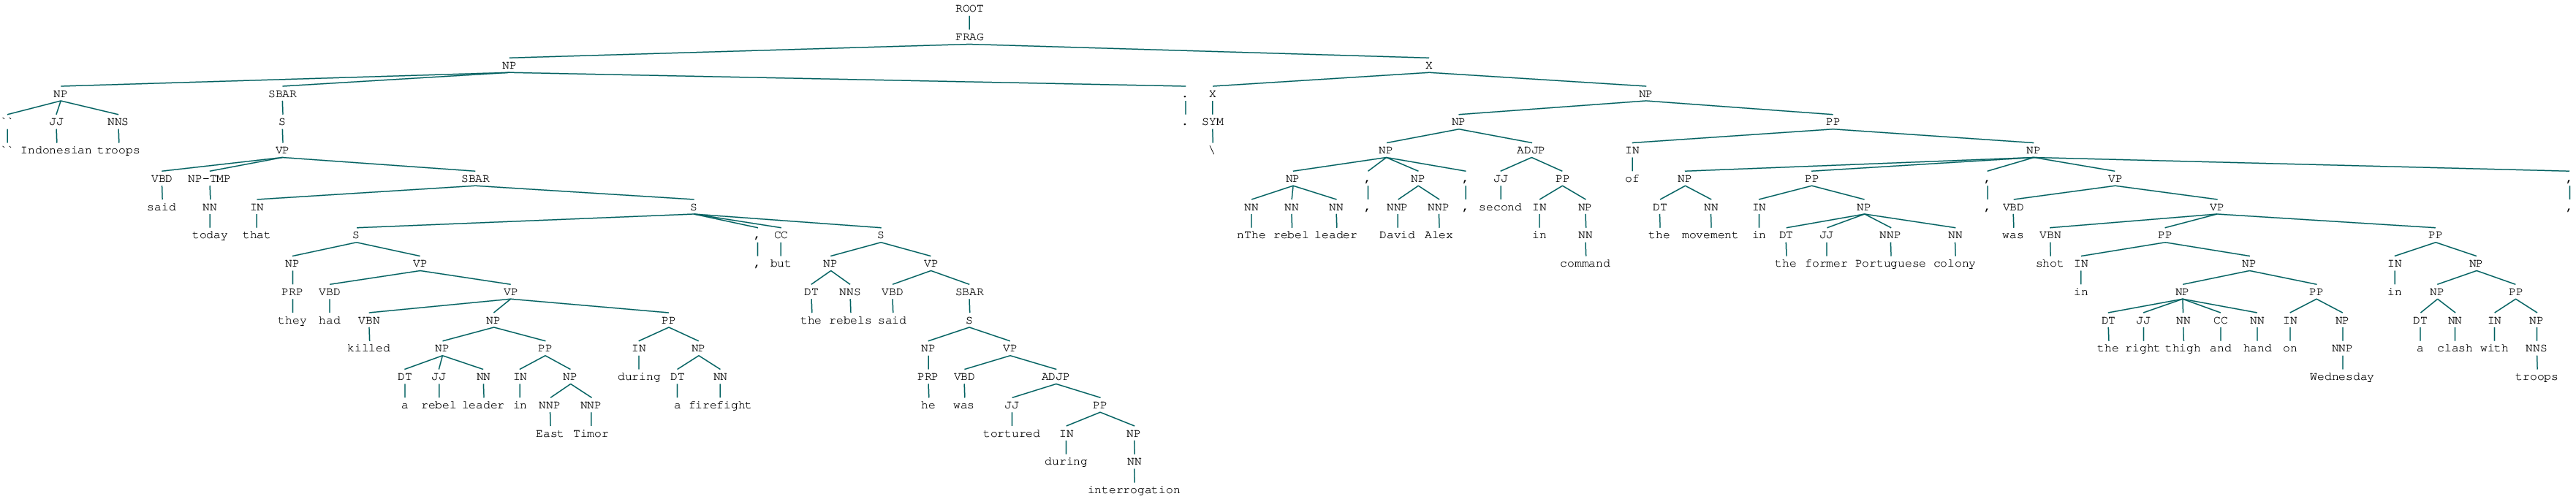

'Text = "Indonesian troops said today that they had killed a rebel leader in East Timor during a firefight, but the rebels said he was tortured during interrogation.\\nThe rebel leader, David Alex, second in command of the movement in the former Portuguese colony, was shot in the right thigh and hand on Wednesday in a clash with troops,'

'Code = 186'

'AID = 23579973'

12

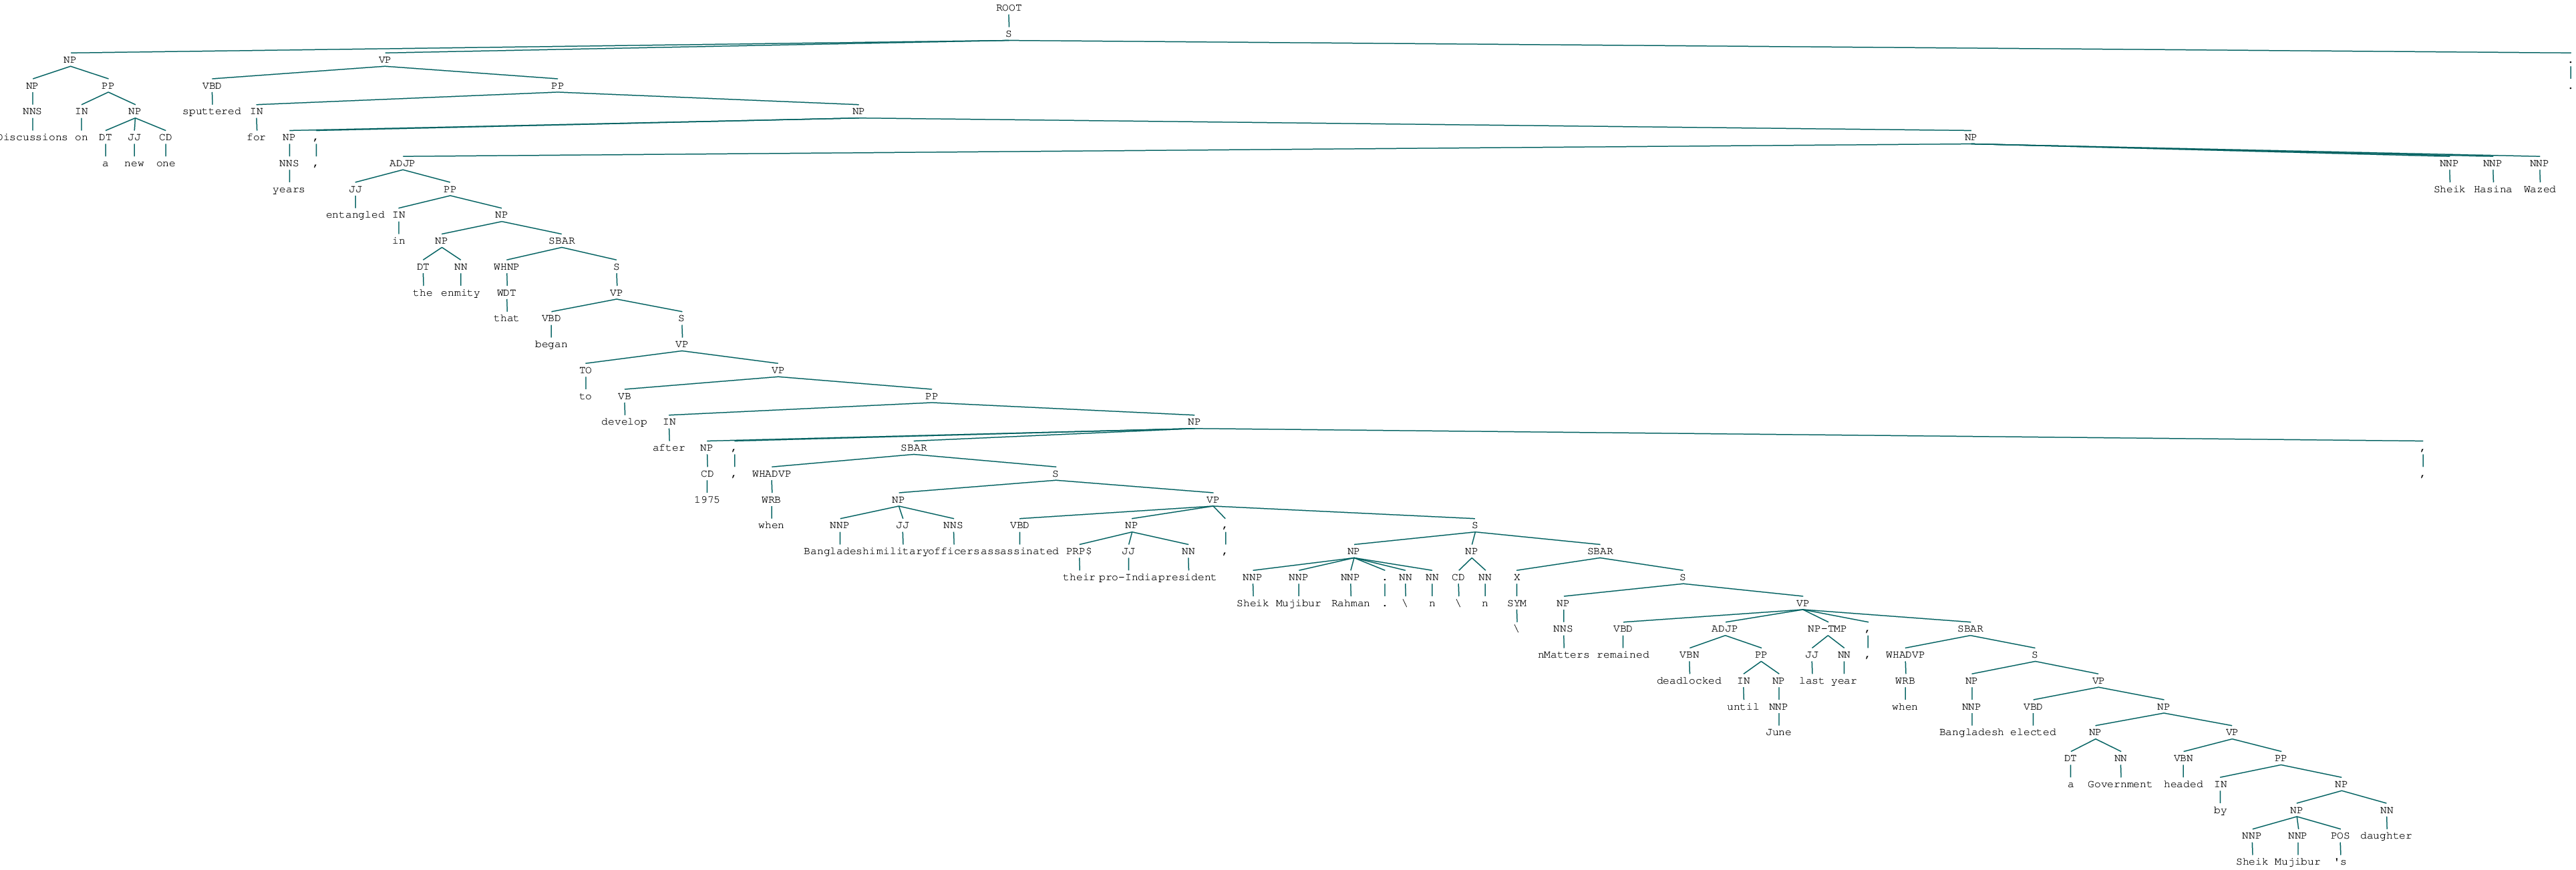

"Text = Discussions on a new one sputtered for years, entangled in the enmity that began to develop after 1975, when Bangladeshi military officers assassinated their pro-India president, Sheik Mujibur Rahman.\\n\\n\\nMatters remained deadlocked until June last year, when Bangladesh elected a Government headed by Sheik Mujibur's daughter, Sheik Hasina Wazed."

'Code = 186'

'AID = 23582500'

13

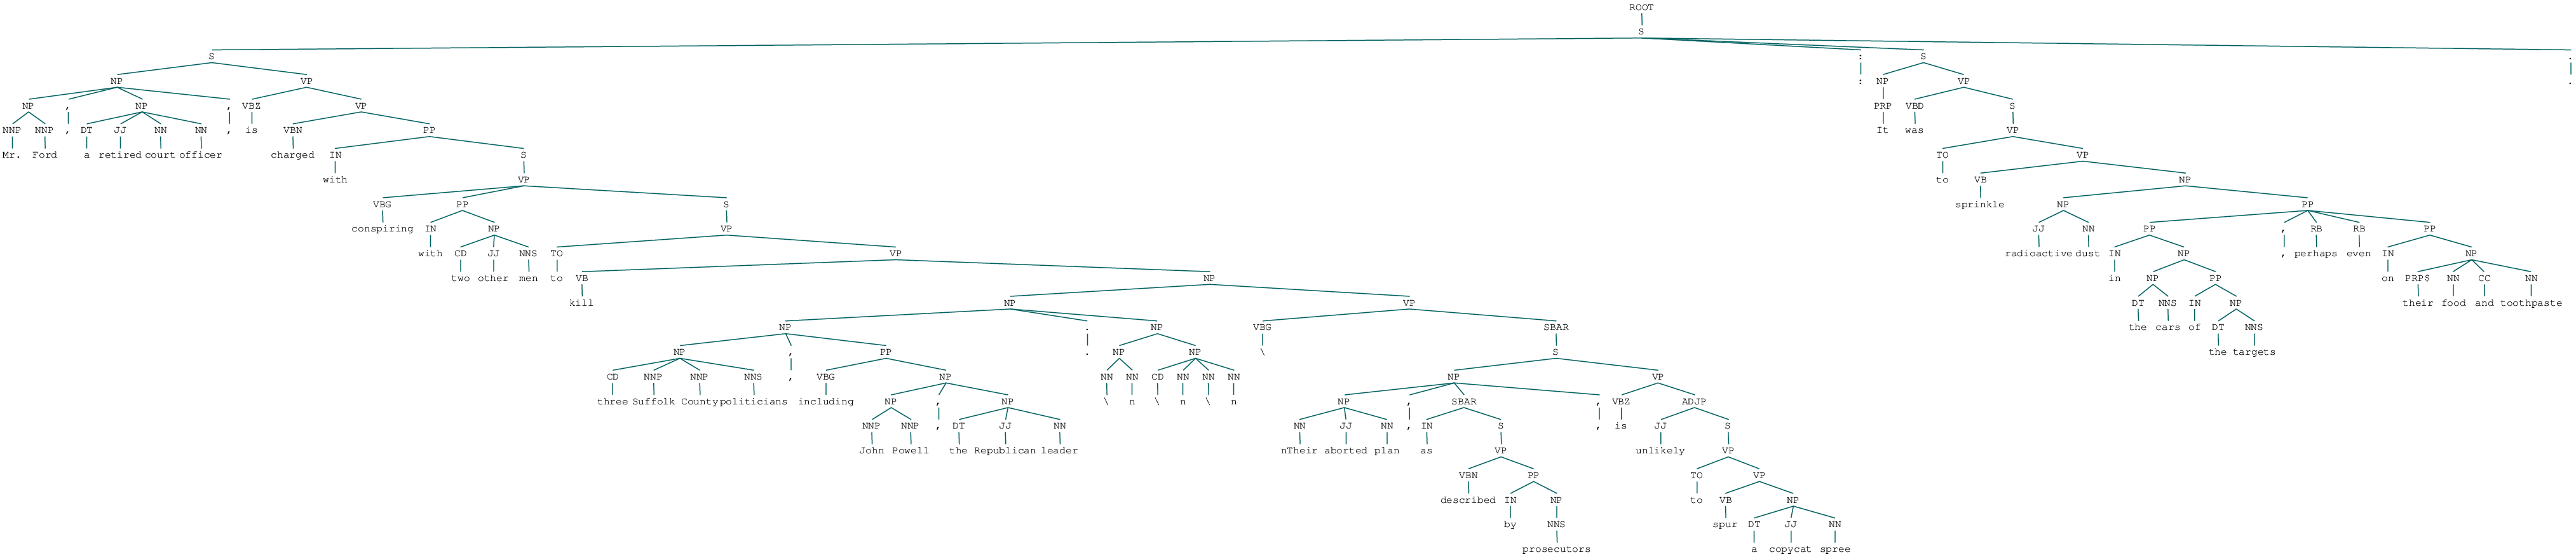

'Text = Mr. Ford, a retired court officer, is charged with conspiring with two other men to kill three Suffolk County politicians, including John Powell, the Republican leader.\\n\\n\\n\\nTheir aborted plan, as described by prosecutors, is unlikely to spur a copycat spree: It was to sprinkle radioactive dust in the cars of the targets, perhaps even on their food and toothpaste.'

'Code = 186'

'AID = 23590600'

14

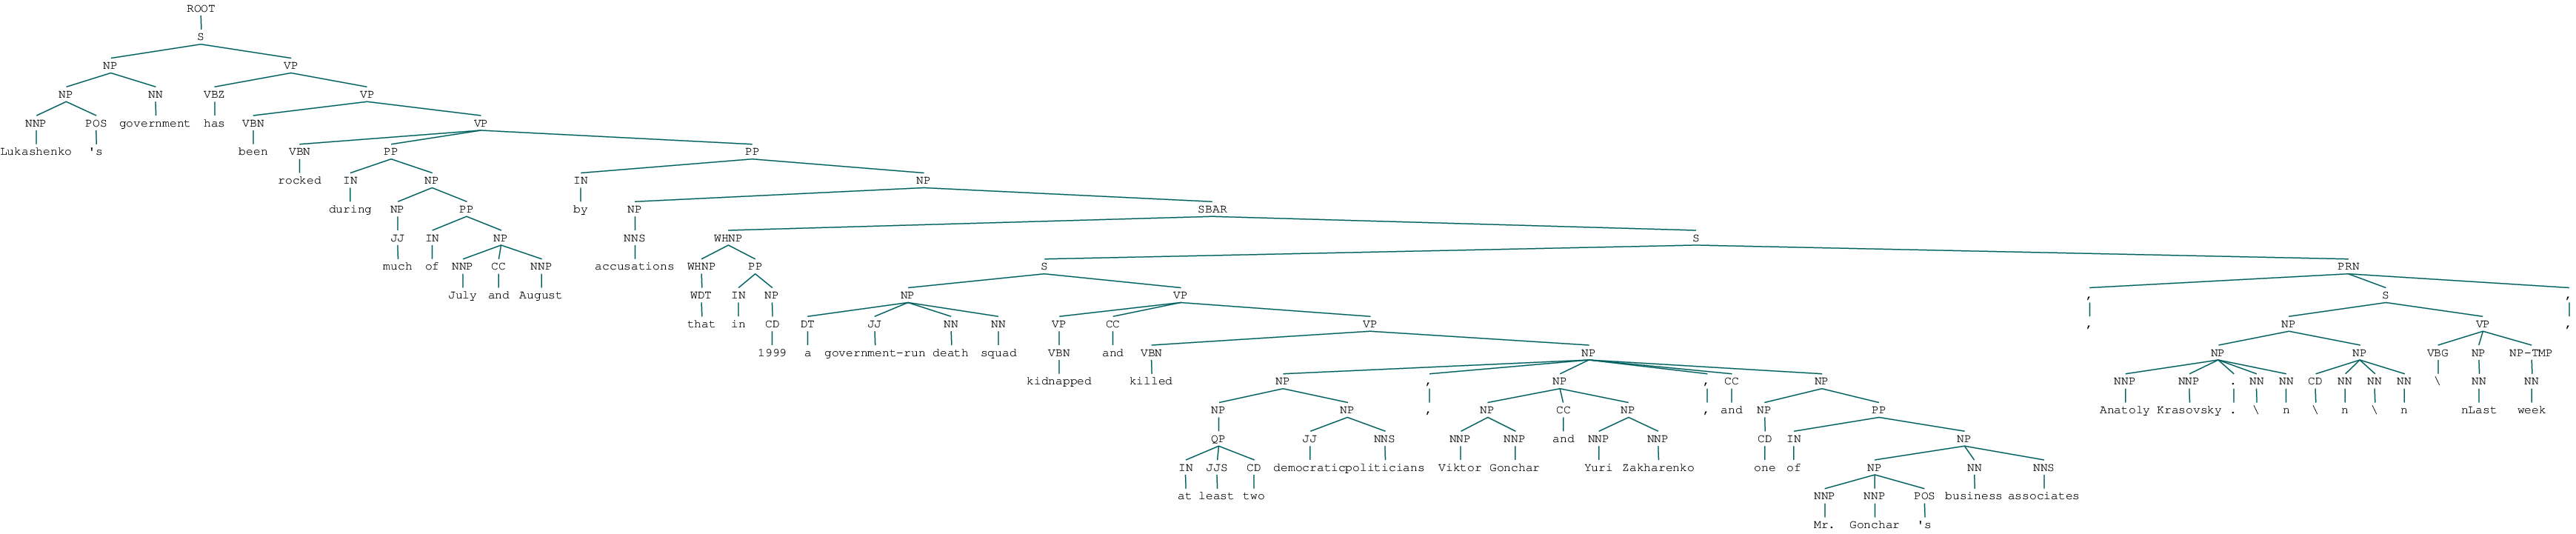

"Text = Lukashenko's government has been rocked during much of July and August by accusations that in 1999 a government-run death squad kidnapped and killed at least two democratic politicians, Viktor Gonchar and Yuri Zakharenko, and one of Mr. Gonchar's business associates, Anatoly Krasovsky.\\n\\n\\n\\nLast week,"

'Code = 186'

'AID = 23781606'

15

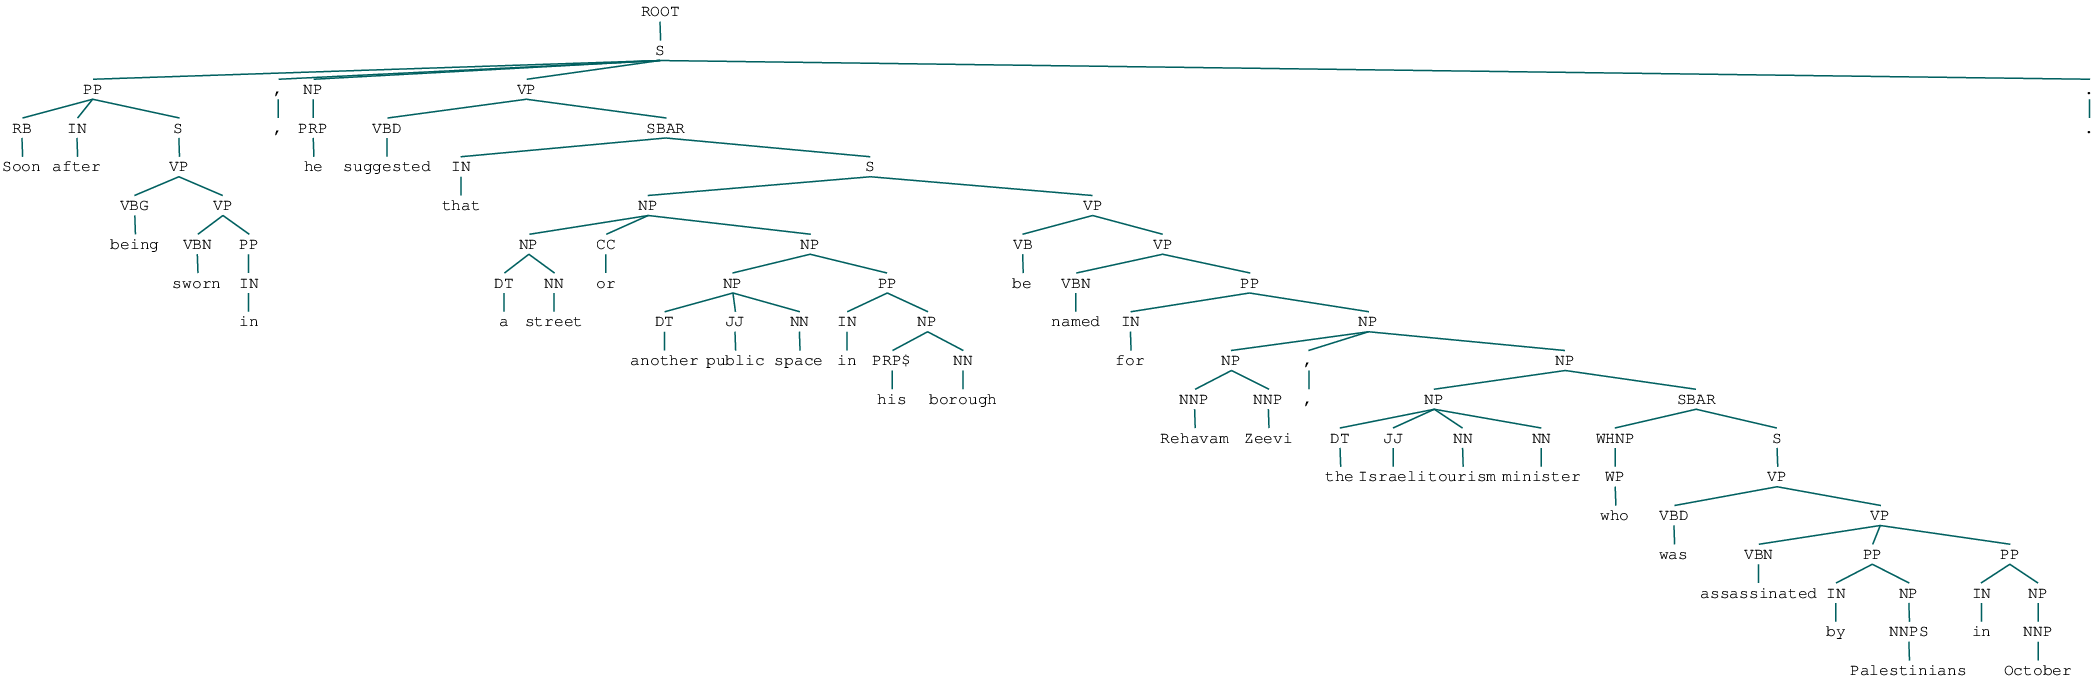

'Text = Soon after being sworn in, he suggested that a street or another public space in his borough be named for Rehavam Zeevi, the Israeli tourism minister who was assassinated by Palestinians in October.'

'Code = 186'

'AID = 23897226'

16

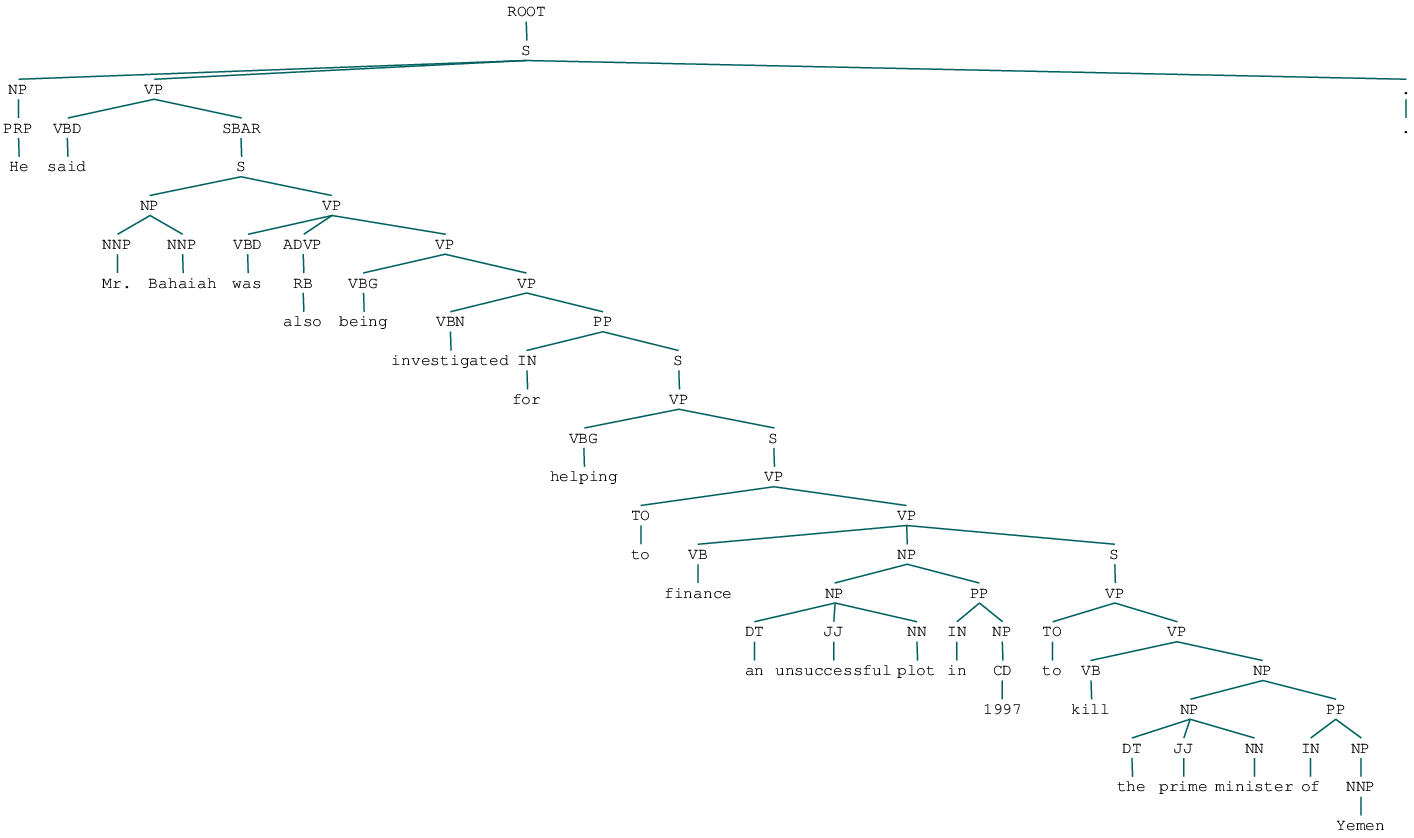

'Text = He said Mr. Bahaiah was also being investigated for helping to finance an unsuccessful plot in 1997 to kill the prime minister of Yemen.'

'Code = 186'

'AID = 23923493'

17

In [9]:
for i in range(len(accent3_186)):
    parsed_output(accent3_186, i)
    display(i)

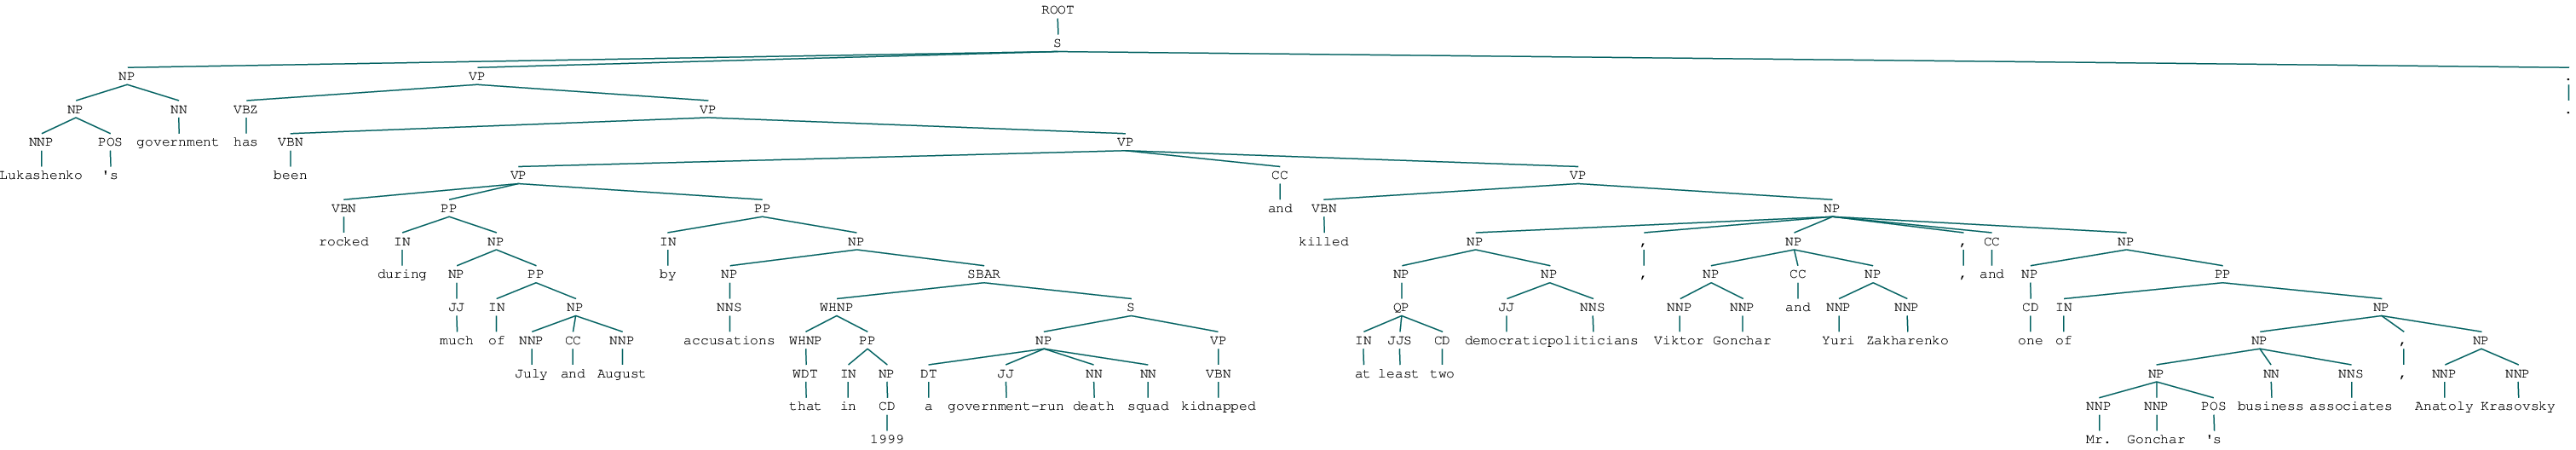

In [17]:
one_sentence_parser("Lukashenko's government has been rocked during much of July and August by accusations that in 1999 a government-run death squad kidnapped and killed at least two democratic politicians, Viktor Gonchar and Yuri Zakharenko, and one of Mr. Gonchar's business associates, Anatoly Krasovsky.")

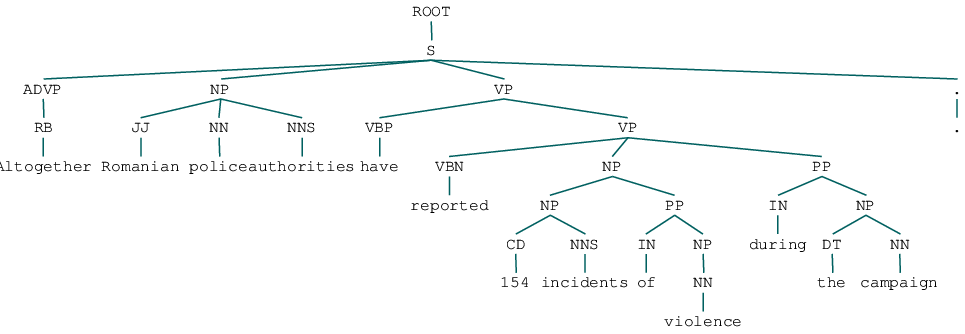

In [15]:
one_sentence_parser("Altogether Romanian police authorities have reported 154 incidents of violence during the campaign.")

# NYTbd Sample 3 Run 2

In [20]:
# Read in NYTbd Sample 3 Run 2 PETRARCH Improvement Data
petrarch3_run2 = pd.read_stata("/Volumes/PartTime/Jonathan Bonaguro - Spring 2020/NYTbd sample 3/Petrarch run 2/NYTbd_sample3_run2_events_text.dta")

In [22]:
petrarch3_run2

,code,text,aid
0,61,In some places the guerrillas are believed to ...,23504892
1,44,Representatives of the army 's Civil Administr...,22829700
2,10,"After the leading presidential candidate , Sen...",23009544
3,50,"Under international pressure , India eventuall...",23582500
4,16,"A spokesman for the Police Minister , Chaim Ba...",22902315
5,111,`` The president condemns in the strongest ter...,23963510
6,190,"Another federal judge , Hector Jimenez , was k...",23009544
7,40,The impasse became clear after President Bush ...,23779485
8,10,"BEHIND PALACE DOORS , THE PRINCE OF Wales some...",22934235
9,40,Prime Minister Ariel Sharon and Mahmoud Abbas ...,23947287


In [144]:
# trim down to relevant codes 
codes = list([140, 141, 143, 145, 1723, 181, 183, 1831, 186])
petrarch3_run2_trim = petrarch3_run2[petrarch3_run2['code'].isin(codes)]

In [160]:
keys = list(['aid', 'code'])
petrarch3_trim_index = petrarch3_trim.set_index(keys).index
petrarch3_run2_trim_index = petrarch3_run2_trim.set_index(keys).index

# Produce df of newly coded events 
petrarch3_run2_only = petrarch3_run2_trim[~petrarch3_run2_trim_index.isin(petrarch3_trim_index)]

In [161]:
petrarch3_run2_only

,code,text,aid
161,1723,On Saturday the authorities had extended the c...,22385083
215,145,Dozens of police officers and civilians were i...,23540772
362,141,"Much larger crowds , meanwhile , joined in a v...",22540430


In [163]:
petrarch3_run2_only['parsed'] = core_parser(petrarch3_run2_only, 'text')
petrarch3_run2_only['dep'] = dep_parser(petrarch3_run2_only, 'text')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


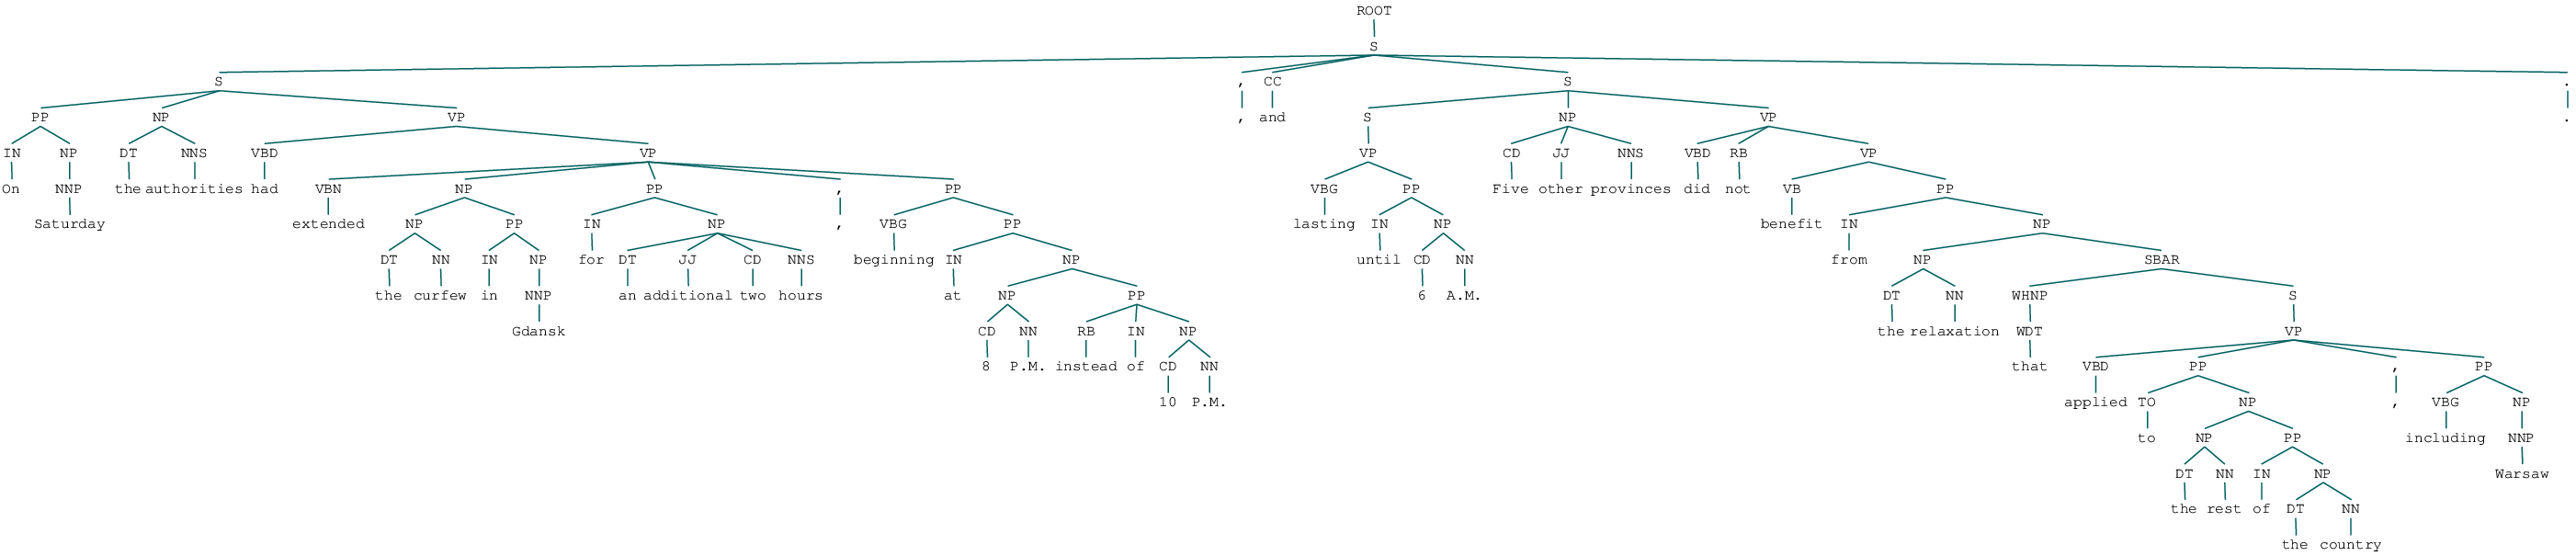

'Text = On Saturday the authorities had extended the curfew in Gdansk for an additional two hours , beginning at 8 P.M. instead of 10 P.M. , and lasting until 6 A.M. Five other provinces did not benefit from the relaxation that applied to the rest of the country , including Warsaw .'

'Code = 1723'

'AID = 22385083'

0

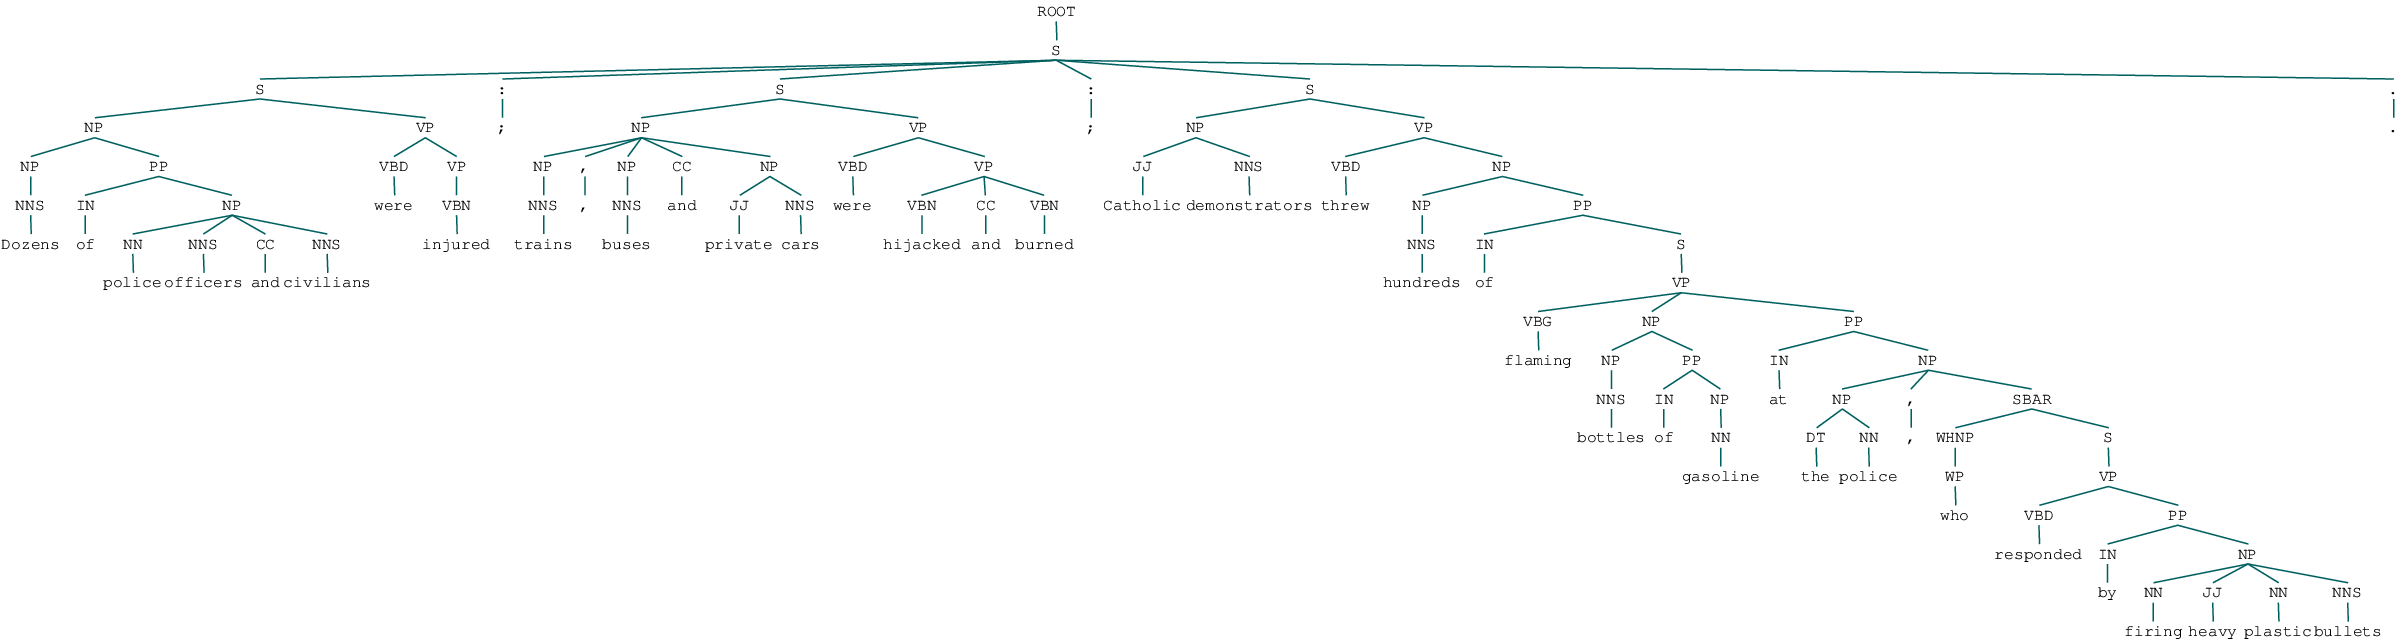

'Text = Dozens of police officers and civilians were injured ; trains , buses and private cars were hijacked and burned ; Catholic demonstrators threw hundreds of flaming bottles of gasoline at the police , who responded by firing heavy plastic bullets .'

'Code = 145'

'AID = 23540772'

1

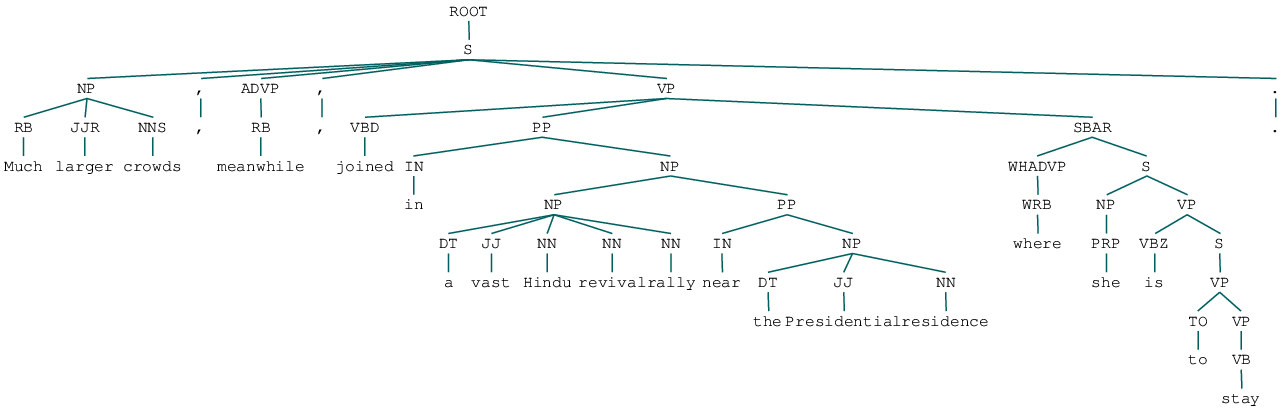

'Text = Much larger crowds , meanwhile , joined in a vast Hindu revival rally near the Presidential residence where she is to stay .'

'Code = 141'

'AID = 22540430'

2

In [165]:
for i in range(len(petrarch3_run2_only)):
    parsed_output(petrarch3_run2_only, i)
    display(i)